In [1]:
from matplotlib import pyplot as plt
import microhapdb
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm

In [2]:
def load_ucsc_rmsk_track(path):
    header = [
        "bin", "swScore", "milliDiv", "milliDel", "milliIns", "genoName", "genoStart", "genoEnd", "genoLeft",
        "strand", "repName", "repClass", "repFamily", "repStart", "repEnd", "repLeft", "id"
    ]
    table = pd.read_csv(path, sep="\t", names=header)
    return table

In [4]:
def flag_repetitive_markers(markers, rmsk_table, delta=0):
    for marker in markers:
        start = marker.start - delta
        end = marker.end + delta
        overlap = rmsk_table[(rmsk_table.genoName == marker.chrom) & (rmsk_table.genoEnd > start) & (rmsk_table.genoStart < end)]
        if len(overlap) == 0:
            yield marker.name, None
        else:
            repeats = list()
            for i, repeat in overlap.iterrows():
                annot = f"{repeat.repName}|{repeat.repClass}"
                if repeat.repFamily != repeat.repClass and repeat.repFamily != repeat.repName:
                    annot += f"|{repeat.repFamily}"
                repeats.append(annot)
            annots = ",".join(repeats)
            yield marker.name, annots

In [5]:
%%time
rmsk = load_ucsc_rmsk_track("rmsk.txt.gz")

CPU times: user 7.43 s, sys: 1.08 s, total: 8.51 s
Wall time: 8.51 s


In [9]:
markers = list(microhapdb.Marker.objectify(microhapdb.markers))
rep_markers = list(tqdm(flag_repetitive_markers(markers, rmsk, delta=25), total=len(markers)))
rep_markers = [(markerid, annot) for markerid, annot in rep_markers if annot is not None]

  0%|          | 0/3053 [00:00<?, ?it/s]

In [10]:
len(rep_markers)

1380

In [27]:
import json
print(json.dumps(rep_markers))

[["mh01LW-3", "AluJo|SINE|Alu,MIRc|SINE|MIR"], ["mh01SCUZJ-0000740", "AluY|SINE|Alu"], ["mh01WL-097.v2", "(CTTACACATG)n|Simple_repeat"], ["mh01SCUZJ-0016447", "MER41D|LTR|ERV1,L1MC1|LINE|L1,THE1B|LTR|ERVL-MaLR"], ["mh01KK-106", "MIRb|SINE|MIR"], ["mh01WL-095", "L2b|LINE|L2"], ["mh01SCUZJ-0041531", "AluY|SINE|Alu,(AAAT)n|Simple_repeat,AluY|SINE|Alu"], ["mh01WL-098", "(GTTT)n|Simple_repeat"], ["mh01CP-007", "MIRc|SINE|MIR"], ["mh01CP-008", "AluY|SINE|Alu"], ["mh01SCUZJ-0062205", "L1MC4a|LINE|L1,AluSz|SINE|Alu,L1MC4a|LINE|L1"], ["mh01ZBF-001", "AluY|SINE|Alu,L3|LINE|CR1"], ["mh01NH-02", "L1ME5|LINE|L1"], ["mh01WL-080", "MIRb|SINE|MIR"], ["mh01SCUZJ-0076454", "MIRb|SINE|MIR"], ["mh01SCUZJ-0081962", "AluY|SINE|Alu,AluSx1|SINE|Alu"], ["mh01SCUZJ-0082140", "(CTGCCCCT)n|Simple_repeat,L2|LINE"], ["mh01WL-107", "MIRb|SINE|MIR"], ["mh01KK-210", "MIRb|SINE|MIR"], ["mh01SCUZJ-0098514", "L3|LINE|CR1,L2a|LINE|L2"], ["mh01WL-086", "MIRb|SINE|MIR"], ["mh01SCUZJ-0109665.v1", "MIR3|SINE|MIR"], ["mh01SCUZ

In [7]:
rep_markers = [["mh01LW-3", "AluJo|SINE|Alu,MIRc|SINE|MIR"], ["mh01SCUZJ-0000740", "AluY|SINE|Alu"], ["mh01WL-097.v2", "(CTTACACATG)n|Simple_repeat"], ["mh01SCUZJ-0016447", "MER41D|LTR|ERV1,L1MC1|LINE|L1,THE1B|LTR|ERVL-MaLR"], ["mh01KK-106", "MIRb|SINE|MIR"], ["mh01WL-095", "L2b|LINE|L2"], ["mh01SCUZJ-0041531", "AluY|SINE|Alu,(AAAT)n|Simple_repeat,AluY|SINE|Alu"], ["mh01WL-098", "(GTTT)n|Simple_repeat"], ["mh01CP-007", "MIRc|SINE|MIR"], ["mh01CP-008", "AluY|SINE|Alu"], ["mh01SCUZJ-0062205", "L1MC4a|LINE|L1,AluSz|SINE|Alu,L1MC4a|LINE|L1"], ["mh01ZBF-001", "AluY|SINE|Alu,L3|LINE|CR1"], ["mh01NH-02", "L1ME5|LINE|L1"], ["mh01WL-080", "MIRb|SINE|MIR"], ["mh01SCUZJ-0076454", "MIRb|SINE|MIR"], ["mh01SCUZJ-0081962", "AluY|SINE|Alu,AluSx1|SINE|Alu"], ["mh01SCUZJ-0082140", "(CTGCCCCT)n|Simple_repeat,L2|LINE"], ["mh01WL-107", "MIRb|SINE|MIR"], ["mh01KK-210", "MIRb|SINE|MIR"], ["mh01SCUZJ-0098514", "L3|LINE|CR1,L2a|LINE|L2"], ["mh01WL-086", "MIRb|SINE|MIR"], ["mh01SCUZJ-0109665.v1", "MIR3|SINE|MIR"], ["mh01SCUZJ-0109665.v2", "MIR3|SINE|MIR"], ["mh01WL-081", "(GCAAGT)n|Simple_repeat"], ["mh01SHY-001", "L2a|LINE|L2"], ["mh01WL-116", "(CTGCT)n|Simple_repeat"], ["mh01SCUZJ-0156524", "L2c|LINE|L2,MIR|SINE,L2c|LINE|L2"], ["mh01SCUZJ-0165190", "LTR5A|LTR|ERVK"], ["mh01CP-016", "MIRb|SINE|MIR"], ["mh01SCUZJ-0212470", "HERVH-int|LTR|ERV1"], ["mh01SCUZJ-0237331", "LTR12C|LTR|ERV1"], ["mh01USC-1pC", "MLT1E1|LTR|ERVL-MaLR"], ["mh01WL-088.v2", "L1ME3G|LINE|L1"], ["mh01SCUZJ-0258509", "AluSc8|SINE|Alu"], ["mh01SCUZJ-0260152", "AluSz|SINE|Alu,AluJb|SINE|Alu"], ["mh01WL-083", "(CTTT)n|Simple_repeat"], ["mh01SCUZJ-0270838", "MER77|LTR|ERVL,L1PA3|LINE|L1"], ["mh01SCUZJ-0275072", "(ATATACAC)n|Simple_repeat,(TATATG)n|Simple_repeat"], ["mh01WL-078", "L1ME3|LINE|L1"], ["mh01SCUZJ-0285696", "OldhAT1|DNA|hAT-Ac,MLT1K|LTR|ERVL-MaLR"], ["mh01SCUZJ-0291678", "L2b|LINE|L2,L2a|LINE|L2"], ["mh01SCUZJ-0293896", "MIRc|SINE|MIR"], ["mh01WL-114", "MIRb|SINE|MIR"], ["mh01SCUZJ-0312202", "AluY|SINE|Alu"], ["mh01SCUZJ-0338874", "AluSz|SINE|Alu,(TAA)n|Simple_repeat,(AAG)n|Simple_repeat"], ["mh01SCUZJ-0357248", "ALR/Alpha|Satellite|centr"], ["mh01SCUZJ-0357485", "ALR/Alpha|Satellite|centr"], ["mh01SCUZJ-0379058", "AluSp|SINE|Alu,L2c|LINE|L2"], ["mh01SCUZJ-0396461", "MER57F|LTR|ERV1"], ["mh01KK-211.v4", "(GGAAGTG)n|Simple_repeat"], ["mh01SCUZJ-0398141", "MIRc|SINE|MIR,MER94|DNA|hAT-Blackjack,AluJr|SINE|Alu"], ["mh01SCUZJ-0404628", "MIR|SINE"], ["mh01SCUZJ-0458139", "HERVH-int|LTR|ERV1"], ["mh01USC-1qB", "MIRb|SINE|MIR"], ["mh01ZHA-009", "MIRb|SINE|MIR"], ["mh01SCUZJ-0481939", "(TTCC)n|Simple_repeat"], ["mh01SCUZJ-0483367", "(AT)n|Simple_repeat,(GT)n|Simple_repeat,L1MC4a|LINE|L1"], ["mh01SCUZJ-0506502", "(GGAGCC)n|Simple_repeat"], ["mh01SCUZJ-0508420", "(TA)n|Simple_repeat,(TA)n|Simple_repeat"], ["mh01USC-1qC.v2", "AluJb|SINE|Alu,L1MC2|LINE|L1"], ["mh01USC-1qC.v1", "L1MC2|LINE|L1"], ["mh01SCUZJ-0533772", "UCON132b|DNA|hAT-Tip100"], ["mh01WL-047.v1", "MLT1O|LTR|ERVL-MaLR"], ["mh01WL-047.v2", "MLT1O|LTR|ERVL-MaLR"], ["mh01SCUZJ-0568347", "L2a|LINE|L2"], ["mh01WL-074", "(CTGCCC)n|Simple_repeat"], ["mh01SCUZJ-0577309", "(TTTA)n|Simple_repeat,MER66B|LTR|ERV1,LTR85c|LTR|Gypsy?,AluJr|SINE|Alu"], ["mh01SCUZJ-0582920", "L1PA4|LINE|L1"], ["mh01SCUZJ-0583641", "(ACATAT)n|Simple_repeat"], ["mh01SCUZJ-0589288", "L1ME4a|LINE|L1"], ["mh01SCUZJ-0598913", "MER104|DNA|TcMar-Tc2"], ["mh01SCUZJ-0604411", "AluJo|SINE|Alu,(TG)n|Simple_repeat,AluJo|SINE|Alu"], ["mh01KK-213.v3", "LTR36|LTR|ERV1"], ["mh01KK-213.v1", "LTR36|LTR|ERV1"], ["mh01KK-213.v2", "LTR36|LTR|ERV1"], ["mh01SCUZJ-0617755", "AluSc8|SINE|Alu,L2a|LINE|L2,(CT)n|Simple_repeat,L2a|LINE|L2"], ["mh01SCUZJ-0633517", "AluSc|SINE|Alu,MER21B|LTR|ERVL"], ["mh01SCUZJ-0638849", "AluY|SINE|Alu"], ["mh01HYP-02", "AluJr|SINE|Alu"], ["mh01SCUZJ-0662222", "AluY|SINE|Alu,FLAM_C|SINE|Alu"], ["mh01SCUZJ-0667867", "AluY|SINE|Alu"], ["mh01SCUZJ-0675568", "AluY|SINE|Alu,Tigger1|DNA|TcMar-Tigger"], ["mh02SCUZJ-0004047.v1", "L1M5|LINE|L1"], ["mh02SCUZJ-0013841", "MIRc|SINE|MIR"], ["mh02SCUZJ-0025110", "AluSx|SINE|Alu"], ["mh02SCUZJ-0030534", "(TC)n|Simple_repeat,(TA)n|Simple_repeat"], ["mh02SCUZJ-0032084", "(TC)n|Simple_repeat,(AT)n|Simple_repeat"], ["mh02SCUZJ-0038503", "(CG)n|Simple_repeat,(CA)n|Simple_repeat,(AG)n|Simple_repeat,L1ME4a|LINE|L1,MIRc|SINE|MIR"], ["mh02SCUZJ-0043006", "(TA)n|Simple_repeat"], ["mh02SCUZJ-0044444", "(TA)n|Simple_repeat,(GTATAC)n|Simple_repeat,(TA)n|Simple_repeat,L1ME3Cz|LINE|L1,AluSx1|SINE|Alu"], ["mh02SCUZJ-0061890", "LTR78|LTR|ERV1,MIRb|SINE|MIR"], ["mh02ZHA-001", "MIRc|SINE|MIR"], ["mh02SCUZJ-0067070", "(GT)n|Simple_repeat"], ["mh02SCUZJ-0082461", "LTR5A|LTR|ERVK"], ["mh02LV-08.v2", "AluSc5|SINE|Alu"], ["mh02LV-08.v1", "AluSc5|SINE|Alu"], ["mh02NH-05", "MamGypLTR1a|LTR|Gypsy"], ["mh02SCUZJ-0105665", "L1ME3D|LINE|L1,MamRep38|DNA|hAT"], ["mh02SCUZJ-0127632", "LTR89|LTR|ERVL?"], ["mh02WL-088.v2", "MIRc|SINE|MIR"], ["mh02WL-088.v1", "MIRc|SINE|MIR"], ["mh02SCUZJ-0148472", "(GA)n|Simple_repeat"], ["mh02LW-6", "FRAM|SINE|Alu"], ["mh02SCUZJ-0157891", "L1PA2|LINE|L1"], ["mh02SCUZJ-0160617", "L1MB3|LINE|L1"], ["mh02WL-007", "LTR41|LTR|ERVL,(GT)n|Simple_repeat"], ["mh02SCUZJ-0190002.v1", "AluY|SINE|Alu"], ["mh02SCUZJ-0190002.v2", "AluY|SINE|Alu"], ["mh02SCUZJ-0202886", "GA-rich|Low_complexity,(AGAA)n|Simple_repeat,GA-rich|Low_complexity"], ["mh02WL-069", "MIR|SINE"], ["mh02SCUZJ-0224273.v1", "(GGAAA)n|Simple_repeat,G-rich|Low_complexity"], ["mh02SCUZJ-0224273.v2", "(GGAAA)n|Simple_repeat,G-rich|Low_complexity"], ["mh02KK-029.v1", "L2b|LINE|L2"], ["mh02KK-029.v2", "L2b|LINE|L2"], ["mh02KK-029.v4", "L2b|LINE|L2"], ["mh02KK-029.v5", "L2b|LINE|L2"], ["mh02SCUZJ-0232405", "AluSx|SINE|Alu,AluJb|SINE|Alu,(AAAC)n|Simple_repeat,AluJb|SINE|Alu"], ["mh02SCUZJ-0244318.v1", "AluSx3|SINE|Alu"], ["mh02SCUZJ-0244318.v2", "AluSx3|SINE|Alu,(AAAAC)n|Simple_repeat,L2b|LINE|L2"], ["mh02SCUZJ-0250065", "L1PA2|LINE|L1"], ["mh02WL-093", "(TATC)n|Simple_repeat"], ["mh02SCUZJ-0253084", "HERVH-int|LTR|ERV1"], ["mh02ZHA-003", "AluSc|SINE|Alu,AluSq2|SINE|Alu,AluJo|SINE|Alu"], ["mh02SCUZJ-0268507", "AluY|SINE|Alu,(AAAT)n|Simple_repeat"], ["mh02LW-7", "MLT2B4|LTR|ERVL,(TC)n|Simple_repeat,(TA)n|Simple_repeat,Ricksha_c|DNA|MULE-MuDR"], ["mh02ZBF-001", "AluSx3|SINE|Alu"], ["mh02SCUZJ-0308581.v1", "AluY|SINE|Alu,(CTTT)n|Simple_repeat"], ["mh02SCUZJ-0308581.v2", "AluY|SINE|Alu,(CTTT)n|Simple_repeat"], ["mh02USC-2qA", "L2c|LINE|L2"], ["mh02KK-013.v1", "L2a|LINE|L2"], ["mh02KK-013.v2", "L2a|LINE|L2"], ["mh02SCUZJ-0317355", "X7B_LINE|LINE|CR1,MamRep38|DNA|hAT"], ["mh02KK-202", "L2a|LINE|L2"], ["mh02KK-102", "MER5B|DNA|hAT-Charlie"], ["mh02SCUZJ-0332125", "MER34|LTR|ERV1,AluJr|SINE|Alu"], ["mh02KK-004.v2", "MIRb|SINE|MIR"], ["mh02KK-004.v1", "MIRb|SINE|MIR"], ["mh02KK-031.v2", "AluY|SINE|Alu"], ["mh02KK-031.v1", "AluY|SINE|Alu"], ["mh02SCUZJ-0360106", "L2a|LINE|L2,(CT)n|Simple_repeat"], ["mh02SCUZJ-0378972", "L1MA9|LINE|L1"], ["mh02SHY-002.v1", "LTR45C|LTR|ERV1"], ["mh02SCUZJ-0390961.v1", "LTR84a|LTR|ERVL,AluY|SINE|Alu"], ["mh02SCUZJ-0390961.v2", "AluY|SINE|Alu"], ["mh02WL-057", "L4_A_Mam|LINE|RTE-X"], ["mh02SCUZJ-0400681", "(AT)n|Simple_repeat"], ["mh02ZHA-013.v2", "AluY|SINE|Alu"], ["mh02ZHA-013.v3", "AluY|SINE|Alu"], ["mh02ZHA-013.v1", "AluY|SINE|Alu"], ["mh02SCUZJ-0409633", "(TG)n|Simple_repeat"], ["mh02SCUZJ-0413888", "(ATATAT)n|Simple_repeat"], ["mh02WL-101", "(TTCA)n|Simple_repeat"], ["mh02SCUZJ-0419421", "AluY|SINE|Alu,GA-rich|Low_complexity"], ["mh02SCUZJ-0429492", "(AACTA)n|Simple_repeat,(TC)n|Simple_repeat"], ["mh02WL-047.v2", "(AC)n|Simple_repeat"], ["mh02WL-047.v1", "(AC)n|Simple_repeat"], ["mh02WL-075", "(TA)n|Simple_repeat"], ["mh02SCUZJ-0461323", "AluSc|SINE|Alu,AluY|SINE|Alu"], ["mh02SCUZJ-0477460", "(GAGG)n|Simple_repeat,(GA)n|Simple_repeat"], ["mh02SCUZJ-0485101", "AluJr|SINE|Alu"], ["mh02USC-2qC", "L1MC5a|LINE|L1"], ["mh02WL-014", "L2a|LINE|L2"], ["mh02SCUZJ-0497317", "HERVH-int|LTR|ERV1"], ["mh02LV-05.v1", "THE1B|LTR|ERVL-MaLR"], ["mh02LV-05.v2", "THE1B|LTR|ERVL-MaLR"], ["mh02WL-077", "MamSINE1|SINE|tRNA-RTE"], ["mh02WL-044", "MIR3|SINE|MIR"], ["mh02SCUZJ-0510209", "AluSx1|SINE|Alu,(ATCT)n|Simple_repeat,(AT)n|Simple_repeat,AluSc|SINE|Alu"], ["mh02WL-098", "(AC)n|Simple_repeat"], ["mh02LW-9", "AluSx1|SINE|Alu"], ["mh02WL-049", "MLT1A0|LTR|ERVL-MaLR"], ["mh02WL-071", "AluSz|SINE|Alu"], ["mh02USC-2qD", "MER74A|LTR|ERVL"], ["mh02ZHA-008", "MER20|DNA|hAT-Charlie"], ["mh02SCUZJ-0606389", "(TTTC)n|Simple_repeat"], ["mh02SCUZJ-0611908", "LTR32|LTR|ERVL"], ["mh02SCUZJ-0626428", "Tigger3b|DNA|TcMar-Tigger,(TG)n|Simple_repeat,Tigger3b|DNA|TcMar-Tigger"], ["mh02KK-136.v2", "MIR|SINE"], ["mh02KK-136.v3", "MIR|SINE"], ["mh02KK-136.v1", "MIR|SINE"], ["mh02KK-014.v5", "L2a|LINE|L2"], ["mh02KK-014.v3", "L2a|LINE|L2"], ["mh02KK-014.v1", "L2a|LINE|L2"], ["mh02KK-014.v2", "L2a|LINE|L2"], ["mh02KK-014.v4", "L2a|LINE|L2"], ["mh02SCUZJ-0634240", "AluSx1|SINE|Alu,L2b|LINE|L2"], ["mh02SCUZJ-0637033", "LTR106_Mam|LTR,AluSx1|SINE|Alu"], ["mh02WL-012", "MIRb|SINE|MIR"], ["mh02SCUZJ-0642566", "MER2|DNA|TcMar-Tigger,AluJr|SINE|Alu,MER2|DNA|TcMar-Tigger,AluSc|SINE|Alu"], ["mh02SCUZJ-0643696", "AluY|SINE|Alu"], ["mh02SCUZJ-0646821", "(GAG)n|Simple_repeat"], ["mh02SCUZJ-0649254", "(ACAT)n|Simple_repeat,(TATG)n|Simple_repeat"], ["mh02SCUZJ-0653761", "AluSq2|SINE|Alu"], ["mh02WL-086", "(CA)n|Simple_repeat"], ["mh02SCUZJ-0677360", "(CA)n|Simple_repeat"], ["mh03SCUZJ-0000972.v1", "(TA)n|Simple_repeat,AluY|SINE|Alu"], ["mh03SCUZJ-0000972.v2", "AluY|SINE|Alu"], ["mh03HYP-06", "Charlie24|DNA|hAT-Charlie"], ["mh03SHY-001", "L2a|LINE|L2,L2|LINE"], ["mh03WL-006.v2", "UCON49|LINE|L2"], ["mh03ZHA-009", "AluJo|SINE|Alu"], ["mh03LV-01.v2", "L2b|LINE|L2,AluJb|SINE|Alu"], ["mh03LV-01.v1", "L2b|LINE|L2,AluJb|SINE|Alu"], ["mh03LV-01.v3", "L2b|LINE|L2,AluJb|SINE|Alu"], ["mh03LV-07.v1", "AluY|SINE|Alu"], ["mh03LV-07.v2", "AluY|SINE|Alu,HAL1|LINE|L1"], ["mh03SCUZJ-0048040", "L1MC3|LINE|L1"], ["mh03SCUZJ-0048662", "L2a|LINE|L2,THE1B|LTR|ERVL-MaLR"], ["mh03SCUZJ-0056495", "MLT1A0|LTR|ERVL-MaLR,LTR33|LTR|ERVL"], ["mh03SCUZJ-0058881", "AluJr|SINE|Alu,L2a|LINE|L2"], ["mh03SCUZJ-0064731", "LTR33|LTR|ERVL,L2c|LINE|L2"], ["mh03KK-016.v1", "MIRb|SINE|MIR"], ["mh03KK-016.v2", "MIRb|SINE|MIR"], ["mh03SCUZJ-0080612", "THE1A|LTR|ERVL-MaLR"], ["mh03CP-005", "AluSp|SINE|Alu,L1ME3G|LINE|L1"], ["mh03SCUZJ-0084341", "MamRTE1|LINE|RTE-BovB"], ["mh03WL-046", "MLT1O|LTR|ERVL-MaLR"], ["mh03SCUZJ-0101318", "MLT1H|LTR|ERVL-MaLR,AluSc|SINE|Alu"], ["mh03SCUZJ-0105398", "MIRb|SINE|MIR,LTR49|LTR|ERV1"], ["mh03SCUZJ-0130995", "L1ME3G|LINE|L1,(TA)n|Simple_repeat,(AC)n|Simple_repeat,(TA)n|Simple_repeat"], ["mh03SCUZJ-0138782", "Charlie14a|DNA|hAT-Charlie"], ["mh03SCUZJ-0139620", "AluYe6|SINE|Alu"], ["mh03SCUZJ-0154827", "AluSg|SINE|Alu,MLT1G3|LTR|ERVL-MaLR,(TC)n|Simple_repeat,(TA)n|Simple_repeat"], ["mh03SCUZJ-0161227", "(TA)n|Simple_repeat"], ["mh03KK-017.v4", "MER3|DNA|hAT-Charlie,L1ME3|LINE|L1"], ["mh03KK-017.v5", "MER3|DNA|hAT-Charlie,L1ME3|LINE|L1"], ["mh03KK-017.v3", "L1ME3|LINE|L1"], ["mh03KK-017.v1", "L1ME3|LINE|L1"], ["mh03KK-017.v2", "L1ME3|LINE|L1"], ["mh03SCUZJ-0165954", "AluY|SINE|Alu,(AAC)n|Simple_repeat,AluY|SINE|Alu,HAL1|LINE|L1"], ["mh03SCUZJ-0172202", "MLT1L|LTR|ERVL-MaLR"], ["mh03USC-3pB", "MIRb|SINE|MIR,L2a|LINE|L2"], ["mh03KK-047.v2", "MamRep137|DNA|TcMar-Tigger,L2c|LINE|L2"], ["mh03KK-047.v1", "MamRep137|DNA|TcMar-Tigger,L2c|LINE|L2"], ["mh03KK-008", "MER39|LTR|ERV1"], ["mh03SCUZJ-0197004", "THE1B|LTR|ERVL-MaLR,MLT1C-int|LTR|ERVL-MaLR,MLT1C|LTR|ERVL-MaLR"], ["mh03SCUZJ-0204490", "AluSg|SINE|Alu"], ["mh03LW-11", "AluSg|SINE|Alu"], ["mh03SCUZJ-0214757", "L1MA2|LINE|L1"], ["mh03WL-059", "L2b|LINE|L2"], ["mh03SCUZJ-0229447", "L1MA7|LINE|L1,(TA)n|Simple_repeat"], ["mh03SHY-004", "Zaphod|DNA|hAT-Tip100,Zaphod|DNA|hAT-Tip100"], ["mh03SCUZJ-0234425", "AluSp|SINE|Alu"], ["mh03SCUZJ-0242802", "MER2|DNA|TcMar-Tigger"], ["mh03HYP-07", "MLT1K|LTR|ERVL-MaLR"], ["mh03SCUZJ-0257419", "AluJb|SINE|Alu,MLT1L|LTR|ERVL-MaLR"], ["mh03SCUZJ-0306913", "L1MA3|LINE|L1,L2a|LINE|L2"], ["mh03KK-018.v1", "Charlie2b|DNA|hAT-Charlie"], ["mh03KK-018.v2", "Charlie2b|DNA|hAT-Charlie"], ["mh03SCUZJ-0392555", "L1PA3|LINE|L1"], ["mh03WL-074", "L4_A_Mam|LINE|RTE-X"], ["mh03SCUZJ-0400856", "L1PA6|LINE|L1"], ["mh03SCUZJ-0421208", "(GT)n|Simple_repeat,GA-rich|Low_complexity,(GT)n|Simple_repeat"], ["mh03KK-150.v3", "MIRb|SINE|MIR"], ["mh03KK-150.v1", "MIRb|SINE|MIR,(TTTTG)n|Simple_repeat"], ["mh03KK-150.v2", "MIRb|SINE|MIR,(TTTTG)n|Simple_repeat"], ["mh03SCUZJ-0436981", "SVA_D|Retroposon|SVA"], ["mh03WL-064", "MamRTE1|LINE|RTE-BovB"], ["mh03USC-3qB", "MLT1D|LTR|ERVL-MaLR"], ["mh03SCUZJ-0455199", "L1PA6|LINE|L1"], ["mh03WL-017.v1", "L3|LINE|CR1"], ["mh03WL-017.v2", "L3|LINE|CR1"], ["mh03SCUZJ-0473203", "HERVH-int|LTR|ERV1,HERVH-int|LTR|ERV1"], ["mh03SCUZJ-0489444", "(ATTTC)n|Simple_repeat,AluSg|SINE|Alu"], ["mh03SCUZJ-0490785", "(AC)n|Simple_repeat,(TC)n|Simple_repeat"], ["mh03SCUZJ-0501341", "AluSx|SINE|Alu,MLT1B|LTR|ERVL-MaLR"], ["mh03SCUZJ-0521312", "AluY|SINE|Alu"], ["mh03SCUZJ-0556403", "Ricksha_0|DNA|MULE-MuDR,AluYj4|SINE|Alu,Ricksha_0|DNA|MULE-MuDR"], ["mh03SCUZJ-0556515", "AluY|SINE|Alu"], ["mh03SCUZJ-0589868", "HAL1|LINE|L1,AluSz|SINE|Alu"], ["mh03SCUZJ-0602768.v1", "MER102a|DNA|hAT-Charlie,MER102a|DNA|hAT-Charlie"], ["mh03SCUZJ-0602768.v2", "MER102a|DNA|hAT-Charlie"], ["mh03WL-054", "(ATA)n|Simple_repeat"], ["mh03SCUZJ-0630191", "MIR3|SINE|MIR,MER5B|DNA|hAT-Charlie,MER5B|DNA|hAT-Charlie,MER41D|LTR|ERV1"], ["mh03HYP-10", "MLT1K|LTR|ERVL-MaLR"], ["mh03USC-3qC.v2", "MER53|DNA|hAT"], ["mh03USC-3qC.v3", "MER53|DNA|hAT"], ["mh04SCUZJ-0002446", "(TCTCTC)n|Simple_repeat,(CTGTCT)n|Simple_repeat,(TCTCTC)n|Simple_repeat"], ["mh04SCUZJ-0003326", "L2a|LINE|L2,AluY|SINE|Alu"], ["mh04WL-052.v2", "(TGCCCC)n|Simple_repeat"], ["mh04SCUZJ-0010543", "AluY|SINE|Alu"], ["mh04KK-030.v2", "MER45A|DNA|hAT-Tip100"], ["mh04KK-030.v3", "MER45A|DNA|hAT-Tip100"], ["mh04SCUZJ-0017022", "HERVE-int|LTR|ERV1"], ["mh04SCUZJ-0019973", "HERVH-int|LTR|ERV1"], ["mh04CP-003", "L2|LINE"], ["mh04SCUZJ-0038724", "AluY|SINE|Alu,AluSx3|SINE|Alu"], ["mh04SCUZJ-0041270", "L1MB8|LINE|L1"], ["mh04CP-004", "L1M5|LINE|L1"], ["mh04SCUZJ-0046198", "(TGG)n|Simple_repeat"], ["mh04USC-4pA", "MER47A|DNA|TcMar-Tigger"], ["mh04SCUZJ-0059871.v1", "(CA)n|Simple_repeat"], ["mh04SCUZJ-0059871.v2", "(CA)n|Simple_repeat"], ["mh04ZHA-001", "MER5B|DNA|hAT-Charlie,L1MB5|LINE|L1"], ["mh04SCUZJ-0078389", "L2b|LINE|L2"], ["mh04ZBF-001", "ORSL|DNA|hAT-Tip100"], ["mh04ZHA-002.v3", "MER89|LTR|ERV1"], ["mh04SCUZJ-0094786", "AluSx3|SINE|Alu,L1M5|LINE|L1"], ["mh04SCUZJ-0098303", "MLT1F2|LTR|ERVL-MaLR,MER94|DNA|hAT-Blackjack"], ["mh04SCUZJ-0115278.v1", "MLT2A1|LTR|ERVL,(TA)n|Simple_repeat"], ["mh04SCUZJ-0115278.v2", "(TA)n|Simple_repeat"], ["mh04SCUZJ-0126299", "MSTB1|LTR|ERVL-MaLR"], ["mh04CP-002", "L2b|LINE|L2"], ["mh04SCUZJ-0128388", "AluSg|SINE|Alu,L1ME1|LINE|L1,(GT)n|Simple_repeat"], ["mh04WL-091", "MER33|DNA|hAT-Charlie"], ["mh04WL-031.v1", "(TG)n|Simple_repeat"], ["mh04WL-031.v3", "(TG)n|Simple_repeat"], ["mh04WL-031.v2", "(TG)n|Simple_repeat"], ["mh04LW-13", "LTR12C|LTR|ERV1"], ["mh04SCUZJ-0175374", "LTR16A|LTR|ERVL"], ["mh04USC-4pB", "MIRc|SINE|MIR"], ["mh04KK-011.v2", "Charlie5|DNA|hAT-Charlie"], ["mh04KK-011.v1", "Charlie5|DNA|hAT-Charlie"], ["mh04SCUZJ-0194557.v1", "(AT)n|Simple_repeat"], ["mh04SCUZJ-0194557.v2", "(AT)n|Simple_repeat"], ["mh04SCUZJ-0216446.v1", "MLT2D|LTR|ERVL,AluY|SINE|Alu"], ["mh04SCUZJ-0216446.v2", "AluY|SINE|Alu,MLT2D|LTR|ERVL"], ["mh04SCUZJ-0221035", "GSATII|Satellite|centr"], ["mh04SCUZJ-0221892", "(GAATG)n|Satellite"], ["mh04SCUZJ-0226356", "(CAA)n|Simple_repeat"], ["mh04KK-074", "L2|LINE"], ["mh04WL-012.v3", "AluSg|SINE|Alu"], ["mh04ZHA-004", "(CCACAG)n|Simple_repeat,MIRc|SINE|MIR"], ["mh04SCUZJ-0246595", "MER51-int|LTR|ERV1"], ["mh04USC-4qA", "L1MCa|LINE|L1"], ["mh04SCUZJ-0254883", "(CT)n|Simple_repeat,(AT)n|Simple_repeat,(GT)n|Simple_repeat"], ["mh04WL-035", "L1ME2|LINE|L1"], ["mh04LW-15", "(AT)n|Simple_repeat,(AG)n|Simple_repeat"], ["mh04SCUZJ-0323171", "AluY|SINE|Alu,(ATT)n|Simple_repeat,(TA)n|Simple_repeat,AluJb|SINE|Alu"], ["mh04SCUZJ-0370257", "(ATATAT)n|Simple_repeat"], ["mh04SCUZJ-0374334", "MER103C|DNA|hAT-Charlie,AluY|SINE|Alu"], ["mh04KK-016", "L1MEc|LINE|L1"], ["mh04SCUZJ-0403151", "(AATAG)n|Simple_repeat,L2a|LINE|L2,MER34A|LTR|ERV1"], ["mh04SCUZJ-0414863", "AluSc|SINE|Alu,AluSg|SINE|Alu,AluSc|SINE|Alu"], ["mh04WL-092", "(GACCCA)n|Simple_repeat,(GGCTGCA)n|Simple_repeat"], ["mh04SCUZJ-0418776", "L1ME2|LINE|L1,AluSz|SINE|Alu,(TTA)n|Simple_repeat,AluSz|SINE|Alu"], ["mh04ZHA-007", "MER51-int|LTR|ERV1"], ["mh04WL-081.v1", "(CAAAA)n|Simple_repeat"], ["mh04WL-081.v2", "(CAAAA)n|Simple_repeat"], ["mh04SCUZJ-0442262", "LTR12C|LTR|ERV1"], ["mh04WL-032", "AluSx4|SINE|Alu,(TAAA)n|Simple_repeat"], ["mh04SCUZJ-0474140", "AluSx|SINE|Alu,L1MC5a|LINE|L1,AluJb|SINE|Alu"], ["mh04SCUZJ-0474306", "AluYm1|SINE|Alu,(AT)n|Simple_repeat"], ["mh04WL-050", "Arthur1A|DNA|hAT-Tip100"], ["mh04SCUZJ-0483017", "L1PA4|LINE|L1"], ["mh04SCUZJ-0488072", "SST1|Satellite|centr"], ["mh04SCUZJ-0515541", "(GC)n|Simple_repeat,L1MD2|LINE|L1"], ["mh04SCUZJ-0518603", "(GAT)n|Simple_repeat,(TAT)n|Simple_repeat,AluY|SINE|Alu"], ["mh04WL-057", "L2b|LINE|L2,MER20|DNA|hAT-Charlie"], ["mh04SCUZJ-0536901", "L2a|LINE|L2"], ["mh04LW-16", "AluSp|SINE|Alu,(TAC)n|Simple_repeat,(AAT)n|Simple_repeat"], ["mh04USC-4qC", "MLT1J1|LTR|ERVL-MaLR"], ["mh04SCUZJ-0573519", "AluSx|SINE|Alu"], ["mh04SCUZJ-0576302", "AluY|SINE|Alu"], ["mh04SCUZJ-0580985", "AluSc8|SINE|Alu"], ["mh04SCUZJ-0585795", "THE1B|LTR|ERVL-MaLR,AluY|SINE|Alu"], ["mh04SCUZJ-0606401", "HERVH-int|LTR|ERV1"], ["mh04WL-009.v2", "MIR3|SINE|MIR,AluJr|SINE|Alu"], ["mh04WL-009.v1", "AluJr|SINE|Alu"], ["mh04SCUZJ-0635044.v1", "AluY|SINE|Alu"], ["mh04SCUZJ-0635044.v2", "AluY|SINE|Alu"], ["mh04SCUZJ-0639864", "AluY|SINE|Alu"], ["mh04SCUZJ-0650295", "MER5A1|DNA|hAT-Charlie,L1ME3D|LINE|L1"], ["mh04SCUZJ-0661155", "(CACATA)n|Simple_repeat"], ["mh04WL-090", "GA-rich|Low_complexity"], ["mh04WL-069", "ORSL-2b|DNA|hAT-Tip100"], ["mh04SCUZJ-0666563", "L1MC4|LINE|L1,AluY|SINE|Alu,L1MC4|LINE|L1"], ["mh04SCUZJ-0668434", "AluJr|SINE|Alu"], ["mh04WL-083", "AluJr4|SINE|Alu"], ["mh04SCUZJ-0675378", "MER45R|DNA|hAT-Tip100,AluYh3|SINE|Alu,MER45R|DNA|hAT-Tip100"], ["mh04SCUZJ-0676070", "A-rich|Low_complexity"], ["mh04SCUZJ-0684549.v1", "AluY|SINE|Alu"], ["mh04SCUZJ-0684549.v2", "AluY|SINE|Alu"], ["mh04SCUZJ-0692850", "GA-rich|Low_complexity"], ["mh04SHY-004", "MIRb|SINE|MIR"], ["mh04SCUZJ-0696971", "AluYa5|SINE|Alu,AluSc|SINE|Alu"], ["mh05KK-170.v2", "(AAAC)n|Simple_repeat"], ["mh05KK-170.v3", "(AAAC)n|Simple_repeat"], ["mh05KK-170.v1", "(AAAC)n|Simple_repeat"], ["mh05KK-170.v4", "(AAAC)n|Simple_repeat"], ["mh05SHY-001", "MLT1C|LTR|ERVL-MaLR"], ["mh05SCUZJ-0019879", "AluSg|SINE|Alu,L1ME2|LINE|L1"], ["mh05SHY-003", "L1M5|LINE|L1"], ["mh05SCUZJ-0042261", "THE1B|LTR|ERVL-MaLR"], ["mh05SCUZJ-0050609", "AluY|SINE|Alu"], ["mh05USC-5pA", "MLT1C|LTR|ERVL-MaLR"], ["mh05SCUZJ-0059185", "(TTCA)n|Simple_repeat,L2b|LINE|L2"], ["mh05CP-010", "L1PB1|LINE|L1"], ["mh05HYP-14", "HERVH-int|LTR|ERV1,LTR7|LTR|ERV1"], ["mh05LW-17", "L1M4|LINE|L1,(AT)n|Simple_repeat"], ["mh05WL-025.v1", "(TACATT)n|Simple_repeat"], ["mh05WL-025.v2", "(TACATT)n|Simple_repeat"], ["mh05WL-076", "(ATTAAT)n|Simple_repeat,(GTCAAT)n|Simple_repeat"], ["mh05WL-036", "(TC)n|Simple_repeat"], ["mh05KK-120.v2", "L2c|LINE|L2"], ["mh05KK-122", "MIRc|SINE|MIR"], ["mh05KK-123", "MIR|SINE"], ["mh05SCUZJ-0149834", "(TA)n|Simple_repeat"], ["mh05SCUZJ-0152132", "AluYe5|SINE|Alu"], ["mh05SCUZJ-0157735", "L1M5|LINE|L1,(TTTAA)n|Simple_repeat,L1PB1|LINE|L1"], ["mh05USC-5pB", "L2c|LINE|L2"], ["mh05SCUZJ-0215771", "AluYa5|SINE|Alu,L1MB4|LINE|L1"], ["mh05SCUZJ-0218741", "L4_C_Mam|LINE|RTE-X,MER117|DNA|hAT-Charlie"], ["mh05WL-053", "A-rich|Low_complexity"], ["mh05SCUZJ-0240825", "(TA)n|Simple_repeat"], ["mh05WL-004", "L2a|LINE|L2,AluSx|SINE|Alu"], ["mh05SCUZJ-0263460", "L1PA4|LINE|L1"], ["mh05SCUZJ-0269128", "AluY|SINE|Alu"], ["mh05SCUZJ-0297424", "(GTACGC)n|Simple_repeat"], ["mh05SCUZJ-0315595", "(A)n|Simple_repeat,AluSp|SINE|Alu,(AC)n|Simple_repeat,(AT)n|Simple_repeat"], ["mh05WL-003.v3", "MIR|SINE"], ["mh05SCUZJ-0341693", "AluY|SINE|Alu,L1MC2|LINE|L1"], ["mh05LW-18", "MER110A|LTR|ERV1"], ["mh05SCUZJ-0378712", "AluSg|SINE|Alu"], ["mh05USC-5qC.v2", "L2a|LINE|L2"], ["mh05USC-5qC.v1", "L2a|LINE|L2"], ["mh05WL-051", "(CAGA)n|Simple_repeat"], ["mh05NH-10", "L2c|LINE|L2"], ["mh05SCUZJ-0403869", "MLT1L-int|LTR|ERVL-MaLR"], ["mh05SCUZJ-0427297.v1", "HERVH-int|LTR|ERV1"], ["mh05SCUZJ-0427297.v2", "HERVH-int|LTR|ERV1"], ["mh05WL-065", "(TG)n|Simple_repeat"], ["mh05WL-026.v2", "L2a|LINE|L2"], ["mh05LW-19", "MIRb|SINE|MIR"], ["mh05WL-021", "L2a|LINE|L2"], ["mh05SCUZJ-0468213", "L1PA6|LINE|L1"], ["mh05SCUZJ-0478441", "(AT)n|Simple_repeat"], ["mh05SCUZJ-0482831", "(AC)n|Simple_repeat"], ["mh05ZHA-005", "L2a|LINE|L2"], ["mh05SCUZJ-0491123", "AluSq|SINE|Alu,A-rich|Low_complexity"], ["mh05WL-046.v2", "MIR|SINE"], ["mh05SCUZJ-0509473", "L2|LINE"], ["mh05ZHA-004", "ERV3-16A3_LTR|LTR|ERVL"], ["mh05WL-040", "G-rich|Low_complexity"], ["mh05SCUZJ-0525156.v1", "AluY|SINE|Alu,AluJr4|SINE|Alu"], ["mh05SCUZJ-0525156.v2", "AluY|SINE|Alu"], ["mh05ZHA-002", "MIRb|SINE|MIR"], ["mh05SCUZJ-0529226", "(TG)n|Simple_repeat"], ["mh05SCUZJ-0529358", "AluJr|SINE|Alu,AluY|SINE|Alu"], ["mh06SCUZJ-0000232", "AluY|SINE|Alu"], ["mh06SCUZJ-0001113", "MER44C|DNA|TcMar-Tigger"], ["mh06KK-025", "LTR12C|LTR|ERV1"], ["mh06CP-003", "L1MEi|LINE|L1"], ["mh06SCUZJ-0028667", "LTR12C|LTR|ERV1"], ["mh06SCUZJ-0044939", "MLT1F2|LTR|ERVL-MaLR"], ["mh06WL-082", "L1MA7|LINE|L1"], ["mh06SCUZJ-0056888.v1", "AluYa5|SINE|Alu"], ["mh06SCUZJ-0056888.v2", "AluYa5|SINE|Alu,AluJr4|SINE|Alu"], ["mh06PK-24844", "LTR12C|LTR|ERV1"], ["mh06WL-005.v1", "(TTATATG)n|Simple_repeat"], ["mh06WL-005.v2", "(TTATATG)n|Simple_repeat"], ["mh06SCUZJ-0060725", "(TGTC)n|Simple_repeat,(TCTA)n|Simple_repeat,(CCTA)n|Simple_repeat,L2b|LINE|L2,(TA)n|Simple_repeat,(GT)n|Simple_repeat"], ["mh06SCUZJ-0062900", "AluY|SINE|Alu,AluY|SINE|Alu"], ["mh06SCUZJ-0089255", "AluY|SINE|Alu,L1PA5|LINE|L1"], ["mh06SCUZJ-0126880", "AluY|SINE|Alu,(TTCT)n|Simple_repeat"], ["mh06KK-090.v1", "LTR71B|LTR|ERV1"], ["mh06KK-090.v2", "LTR71B|LTR|ERV1"], ["mh06SHY-001", "MIRb|SINE|MIR"], ["mh06SHY-002", "MIR3|SINE|MIR"], ["mh06PK-25713", "AluJb|SINE|Alu"], ["mh06SCUZJ-0167872", "LTR43-int|LTR|ERV1,LTR43|LTR|ERV1"], ["mh06FHL-002", "MLT1L|LTR|ERVL-MaLR"], ["mh06SHY-003", "L1ME3B|LINE|L1"], ["mh06LV-09", "HERVK22-int|LTR|ERVK,HERVK22-int|LTR|ERVK"], ["mh06WL-039.v1", "L2c|LINE|L2"], ["mh06WL-039.v2", "L2c|LINE|L2"], ["mh06LW-20", "L1MC5|LINE|L1,(TA)n|Simple_repeat,(AG)n|Simple_repeat,AluSz6|SINE|Alu"], ["mh06SCUZJ-0445212", "MIR3|SINE|MIR"], ["mh06SCUZJ-0458246", "PABL_A-int|LTR|ERV1"], ["mh06LW-21", "LTR5A|LTR|ERVK"], ["mh06WL-061", "L4_A_Mam|LINE|RTE-X"], ["mh06USC-6pB", "MLT1H|LTR|ERVL-MaLR"], ["mh06SCUZJ-0480560.v1", "ALR/Alpha|Satellite|centr"], ["mh06SCUZJ-0480560.v2", "ALR/Alpha|Satellite|centr"], ["mh06KK-031", "L2b|LINE|L2"], ["mh06WL-064", "(TC)n|Simple_repeat,(AT)n|Simple_repeat"], ["mh06SCUZJ-0528857", "L1M5|LINE|L1,AluY|SINE|Alu"], ["mh06WL-040", "L1MEf|LINE|L1,(CA)n|Simple_repeat,(GA)n|Simple_repeat,L1PB4|LINE|L1"], ["mh06WL-022", "(CT)n|Simple_repeat"], ["mh06SHY-005.v2", "AluY|SINE|Alu,MLT1G1|LTR|ERVL-MaLR"], ["mh06SHY-005.v1", "MLT1G1|LTR|ERVL-MaLR"], ["mh06WL-035", "(A)n|Simple_repeat"], ["mh06WL-063.v1", "MIR|SINE"], ["mh06WL-063.v2", "MIR|SINE"], ["mh06USC-6qB", "L1MD2|LINE|L1"], ["mh06SCUZJ-0610307", "MIRb|SINE|MIR,L1PA16|LINE|L1"], ["mh06SCUZJ-0616750", "AluSc8|SINE|Alu,(ATAA)n|Simple_repeat,ORSL|DNA|hAT-Tip100"], ["mh06WL-028.v2", "(AT)n|Simple_repeat,A-rich|Low_complexity,(AT)n|Simple_repeat"], ["mh06WL-028.v1", "A-rich|Low_complexity,(AT)n|Simple_repeat"], ["mh06SCUZJ-0638919.v1", "AluY|SINE|Alu,L1MA6|LINE|L1"], ["mh06SCUZJ-0638919.v2", "AluY|SINE|Alu,L1MA6|LINE|L1"], ["mh06SCUZJ-0663860", "LTR12C|LTR|ERV1"], ["mh06USC-6qC", "L1M5|LINE|L1"], ["mh06WL-029.v2", "MER91A|DNA|hAT-Tip100"], ["mh06WL-029.v1", "MER91A|DNA|hAT-Tip100"], ["mh06SCUZJ-0758459.v1", "AluY|SINE|Alu,(AAAC)n|Simple_repeat,MIR|SINE"], ["mh06SCUZJ-0758459.v2", "AluY|SINE|Alu,(AAAC)n|Simple_repeat,MIR|SINE"], ["mh06LW-22", "L1PA6|LINE|L1"], ["mh06SCUZJ-0775073", "AluYe5|SINE|Alu"], ["mh06SCUZJ-0777684", "AluJr|SINE|Alu,AluSg|SINE|Alu"], ["mh06SCUZJ-0794653", "A-rich|Low_complexity,AluYm1|SINE|Alu"], ["mh06WL-009.v2", "(T)n|Simple_repeat,(GTTT)n|Simple_repeat,L2|LINE"], ["mh06WL-009.v3", "(T)n|Simple_repeat,(GTTT)n|Simple_repeat"], ["mh06WL-009.v1", "(T)n|Simple_repeat,(GTTT)n|Simple_repeat,L2|LINE"], ["mh06SCUZJ-0818553", "(TA)n|Simple_repeat"], ["mh06SCUZJ-0819423", "L1PA7|LINE|L1"], ["mh06KK-104", "L2a|LINE|L2"], ["mh06SCUZJ-0834226.v1", "(TC)n|Simple_repeat,(TA)n|Simple_repeat"], ["mh06SCUZJ-0834226.v2", "(TC)n|Simple_repeat,(TA)n|Simple_repeat"], ["mh06SCUZJ-0845279", "AluSx1|SINE|Alu"], ["mh06SCUZJ-0853086", "(CA)n|Simple_repeat,(CA)n|Simple_repeat,(CA)n|Simple_repeat"], ["mh06KK-101", "L1MC5|LINE|L1"], ["mh07SCUZJ-0003371", "AluY|SINE|Alu"], ["mh07SCUZJ-0003928", "AluYh3|SINE|Alu"], ["mh07SCUZJ-0018090", "AluY|SINE|Alu"], ["mh07SCUZJ-0027619", "(AAAT)n|Simple_repeat,AluSx|SINE|Alu"], ["mh07SCUZJ-0039245", "LTR5A|LTR|ERVK"], ["mh07SCUZJ-0040173", "AluSx1|SINE|Alu,(CA)n|Simple_repeat,AluJr|SINE|Alu"], ["mh07FHL-001", "L1M5|LINE|L1"], ["mh07WL-006", "L2|LINE"], ["mh07SCUZJ-0048768", "L2b|LINE|L2"], ["mh07SCUZJ-0053702", "L1MC1|LINE|L1"], ["mh07SCUZJ-0064598", "FLAM_A|SINE|Alu,(AC)n|Simple_repeat"], ["mh07USC-7pA", "L1MEf|LINE|L1"], ["mh07ZBF-001", "AluSq2|SINE|Alu,L1MA4A|LINE|L1"], ["mh07SCUZJ-0081095", "L1MEa|LINE|L1,MLT2B1|LTR|ERVL"], ["mh07WL-085", "MLT1I|LTR|ERVL-MaLR"], ["mh07SCUZJ-0091827", "AluY|SINE|Alu"], ["mh07SCUZJ-0093911", "AluJb|SINE|Alu,L1M4|LINE|L1"], ["mh07CP-004", "SVA_D|Retroposon|SVA"], ["mh07WL-083", "MIR|SINE"], ["mh07SCUZJ-0102959.v1", "(TA)n|Simple_repeat"], ["mh07SCUZJ-0102959.v2", "(TA)n|Simple_repeat"], ["mh07KK-009.v3", "L2b|LINE|L2,MER21C|LTR|ERVL"], ["mh07KK-009.v1", "L2b|LINE|L2,MER21C|LTR|ERVL"], ["mh07KK-009.v2", "L2b|LINE|L2,MER21C|LTR|ERVL"], ["mh07SCUZJ-0114457", "HERVH-int|LTR|ERV1"], ["mh07SCUZJ-0114603", "MIR3|SINE|MIR"], ["mh07WL-042", "(AAC)n|Simple_repeat"], ["mh07FHL-002.v2", "L1MB3|LINE|L1"], ["mh07FHL-002.v1", "L1MB3|LINE|L1"], ["mh07SCUZJ-0126293", "SVA_D|Retroposon|SVA"], ["mh07SHY-001.v1", "THE1A|LTR|ERVL-MaLR"], ["mh07SHY-001.v2", "THE1A|LTR|ERVL-MaLR"], ["mh07SCUZJ-0130504", "L2|LINE"], ["mh07WL-075", "A-rich|Low_complexity"], ["mh07SCUZJ-0141326", "(CAGGGA)n|Simple_repeat"], ["mh07SCUZJ-0153825", "L1MC3|LINE|L1"], ["mh07WL-036", "L2c|LINE|L2"], ["mh07WL-066", "(AC)n|Simple_repeat"], ["mh07SCUZJ-0177079", "AluJr|SINE|Alu"], ["mh07ZHA-003", "L2a|LINE|L2"], ["mh07SCUZJ-0195258", "G-rich|Low_complexity,MLT1A|LTR|ERVL-MaLR"], ["mh07SCUZJ-0197487", "(TA)n|Simple_repeat,(AG)n|Simple_repeat"], ["mh07SCUZJ-0203471", "AluSg|SINE|Alu"], ["mh07HYP-19.v2", "L1MC1|LINE|L1"], ["mh07HYP-19.v3", "L1MC1|LINE|L1"], ["mh07PK-38311", "FLAM_A|SINE|Alu"], ["mh07SCUZJ-0232374", "L1M4|LINE|L1"], ["mh07KK-030", "MIRb|SINE|MIR"], ["mh07SCUZJ-0246006", "(TA)n|Simple_repeat"], ["mh07SCUZJ-0246634", "(TA)n|Simple_repeat,(AC)n|Simple_repeat"], ["mh07FHL-004", "L1M1|LINE|L1"], ["mh07SCUZJ-0269727", "L1M1|LINE|L1"], ["mh07SCUZJ-0279301", "AluSx1|SINE|Alu"], ["mh07SCUZJ-0282207", "AluY|SINE|Alu,LTR32|LTR|ERVL"], ["mh07SHY-002", "MER41A|LTR|ERV1,LTR39|LTR|ERV1"], ["mh07WL-087", "AluSp|SINE|Alu"], ["mh07WL-020.v3", "L4_A_Mam|LINE|RTE-X"], ["mh07WL-020.v2", "L4_A_Mam|LINE|RTE-X"], ["mh07HYP-20", "MSTA|LTR|ERVL-MaLR"], ["mh07LW-23", "AluSq2|SINE|Alu"], ["mh07SCUZJ-0309217", "AluJb|SINE|Alu,(TC)n|Simple_repeat,(TATA)n|Simple_repeat,AluSp|SINE|Alu"], ["mh07SCUZJ-0311471", "AluSx|SINE|Alu"], ["mh07SCUZJ-0325681", "AluSc8|SINE|Alu"], ["mh07SCUZJ-0339304", "L1PA4|LINE|L1"], ["mh07SCUZJ-0350377", "(GCGCAC)n|Simple_repeat,(CA)n|Simple_repeat"], ["mh07SCUZJ-0360945", "L1M4|LINE|L1"], ["mh07SCUZJ-0388024", "L1PA2|LINE|L1"], ["mh07ZHA-009", "L1PA3|LINE|L1"], ["mh07SCUZJ-0395598", "AluY|SINE|Alu"], ["mh07SCUZJ-0400472", "AluSc8|SINE|Alu"], ["mh07WL-057", "LTR80B|LTR|ERVL"], ["mh07SCUZJ-0411309", "AluY|SINE|Alu,MIRb|SINE|MIR"], ["mh07WL-035", "L1PA16|LINE|L1,(TTTC)n|Simple_repeat,ERVL-E-int|LTR|ERVL"], ["mh07SCUZJ-0428708", "(AT)n|Simple_repeat,(AG)n|Simple_repeat,L1MC3|LINE|L1"], ["mh07SCUZJ-0439025", "MER5B|DNA|hAT-Charlie"], ["mh07WL-007.v2", "(CCCT)n|Simple_repeat"], ["mh07SCUZJ-0462646", "AluSc8|SINE|Alu,A-rich|Low_complexity"], ["mh07WL-086", "MIRb|SINE|MIR"], ["mh07WL-011.v1", "(GAGGAATGGG)n|Simple_repeat"], ["mh07WL-011.v3", "(GAGGAATGGG)n|Simple_repeat"], ["mh07WL-011.v2", "(GAGGAATGGG)n|Simple_repeat"], ["mh07SCUZJ-0475111", "AluSg|SINE|Alu,AluJr|SINE|Alu"], ["mh07SCUZJ-0507175", "LTR49-int|LTR|ERV1"], ["mh07USC-7qC", "MIR|SINE"], ["mh07SCUZJ-0515002", "AluYm1|SINE|Alu"], ["mh07SCUZJ-0526402", "HERVE-int|LTR|ERV1"], ["mh07SCUZJ-0526530", "L1MDa|LINE|L1,HERVE_a-int|LTR|ERV1"], ["mh07SCUZJ-0532868", "(ATAT)n|Simple_repeat"], ["mh07SCUZJ-0536318", "MLT1D|LTR|ERVL-MaLR"], ["mh07SCUZJ-0543221", "L1MB7|LINE|L1,L1MC4|LINE|L1"], ["mh08SCUZJ-0001380", "LTR2C|LTR|ERV1"], ["mh08WL-053.v2", "AluSc8|SINE|Alu"], ["mh08ZHA-003", "HERVL40-int|LTR|ERVL"], ["mh08SCUZJ-0027072", "AluSc8|SINE|Alu,L1MC|LINE|L1"], ["mh08SCUZJ-0055163", "AluY|SINE|Alu,L1PB1|LINE|L1"], ["mh08ZHA-008", "MER5A|DNA|hAT-Charlie"], ["mh08SCUZJ-0082014", "MER6|DNA|TcMar-Tigger,AluYf1|SINE|Alu"], ["mh08SHY-001", "L1M4|LINE|L1"], ["mh08SCUZJ-0088755", "AluSg4|SINE|Alu"], ["mh08ZHA-009", "HAL1b|LINE|L1"], ["mh08SCUZJ-0115265", "LTR5A|LTR|ERVK"], ["mh08WL-032.v1", "LTR9A1|LTR|ERV1,(AG)n|Simple_repeat"], ["mh08WL-032.v2", "LTR9A1|LTR|ERV1,(AG)n|Simple_repeat,MIRb|SINE|MIR"], ["mh08KK-032", "L1ME4b|LINE|L1"], ["mh08SCUZJ-0149946", "L1MB7|LINE|L1"], ["mh08SCUZJ-0152604", "MER50B|LTR|ERV1"], ["mh08SCUZJ-0170499", "L1PA2|LINE|L1"], ["mh08SCUZJ-0173990", "MER103C|DNA|hAT-Charlie,(AT)n|Simple_repeat"], ["mh08WL-057", "Tigger1|DNA|TcMar-Tigger"], ["mh08SCUZJ-0190805", "L1M3de|LINE|L1"], ["mh08SCUZJ-0196286", "MER5B|DNA|hAT-Charlie,Arthur1C|DNA|hAT-Tip100"], ["mh08SCUZJ-0210097", "(CA)n|Simple_repeat,MIRb|SINE|MIR"], ["mh08SCUZJ-0214057", "MER21-int|LTR|ERVL"], ["mh08KK-137.v1", "HAL1|LINE|L1"], ["mh08KK-137.v2", "HAL1|LINE|L1"], ["mh08SHY-003", "MLT1C|LTR|ERVL-MaLR,MLT1J|LTR|ERVL-MaLR"], ["mh08SCUZJ-0266782", "ALR/Alpha|Satellite|centr"], ["mh08SCUZJ-0266840", "ALR/Alpha|Satellite|centr"], ["mh08SCUZJ-0270227", "AluSq|SINE|Alu"], ["mh08SCUZJ-0288801", "AluSx|SINE|Alu,L1PB1|LINE|L1,(TA)n|Simple_repeat,(ATATATAC)n|Simple_repeat,(TA)n|Simple_repeat"], ["mh08SCUZJ-0302028", "L1MC4|LINE|L1,(TTG)n|Simple_repeat,AluY|SINE|Alu"], ["mh08WL-033", "MIRb|SINE|MIR"], ["mh08SCUZJ-0315353", "L1PA7|LINE|L1,(ATAC)n|Simple_repeat,L1PA7|LINE|L1"], ["mh08SCUZJ-0319048", "(CA)n|Simple_repeat,(TG)n|Simple_repeat,(TA)n|Simple_repeat"], ["mh08SHY-005", "L1MB8|LINE|L1"], ["mh08WL-068", "(AT)n|Simple_repeat,L1ME4c|LINE|L1"], ["mh08SCUZJ-0351536", "L1PA17|LINE|L1,A-rich|Low_complexity,(GAAGGAAG)n|Simple_repeat,A-rich|Low_complexity"], ["mh08WL-045.v1", "MADE2|DNA|TcMar-Mariner"], ["mh08WL-045.v3", "MADE2|DNA|TcMar-Mariner"], ["mh08SCUZJ-0358922", "MER4A|LTR|ERV1,AluY|SINE|Alu"], ["mh08WL-065", "(GT)n|Simple_repeat"], ["mh08WL-018", "L2a|LINE|L2"], ["mh08LW-24", "LTR12C|LTR|ERV1"], ["mh08WL-056.v2", "L1ME3A|LINE|L1,MARNA|DNA|TcMar-Mariner"], ["mh08WL-056.v1", "MARNA|DNA|TcMar-Mariner"], ["mh08SCUZJ-0386847", "AluSq|SINE|Alu"], ["mh08WL-031", "L3|LINE|CR1"], ["mh08WL-003", "L1M5|LINE|L1"], ["mh08HYP-22", "AluJb|SINE|Alu"], ["mh08SHY-006", "L1ME4c|LINE|L1,THE1A|LTR|ERVL-MaLR"], ["mh08WL-047", "(TG)n|Simple_repeat,GA-rich|Low_complexity"], ["mh08CP-009", "MLT1D|LTR|ERVL-MaLR"], ["mh08WL-058.v2", "(T)n|Simple_repeat"], ["mh08SCUZJ-0470219", "Tigger13a|DNA|TcMar-Tigger"], ["mh08SCUZJ-0474234", "AluY|SINE|Alu"], ["mh08SCUZJ-0476324", "L2a|LINE|L2"], ["mh08SCUZJ-0484105", "AluSx3|SINE|Alu,AluYa5|SINE|Alu"], ["mh08SCUZJ-0489834", "MER5B|DNA|hAT-Charlie"], ["mh08SHY-007.v2", "AluY|SINE|Alu"], ["mh08SHY-007.v3", "AluY|SINE|Alu"], ["mh08WL-063", "L2c|LINE|L2"], ["mh08SCUZJ-0497299", "MIRb|SINE|MIR,MLT1B|LTR|ERVL-MaLR"], ["mh08USC-8qC", "MIRc|SINE|MIR,MamRep1527|LTR"], ["mh08SCUZJ-0518295", "THE1B|LTR|ERVL-MaLR,L1MC3|LINE|L1"], ["mh08HYP-23", "MIRb|SINE|MIR"], ["mh08SCUZJ-0530970", "L2b|LINE|L2"], ["mh08SCUZJ-0538280.v1", "LTR5A|LTR|ERVK"], ["mh08SCUZJ-0538280.v2", "LTR5A|LTR|ERVK"], ["mh09LW-25", "L1PA13|LINE|L1"], ["mh09USC-9pA.v2", "LTR1B|LTR|ERV1"], ["mh09HYP-24", "L2a|LINE|L2"], ["mh09SCUZJ-0032359", "GA-rich|Low_complexity,(AAAAG)n|Simple_repeat"], ["mh09SCUZJ-0035837", "L1ME3F|LINE|L1,AluSc5|SINE|Alu,L1ME3F|LINE|L1"], ["mh09SCUZJ-0042152", "(CATC)n|Simple_repeat,L2c|LINE|L2"], ["mh09SCUZJ-0052579", "L1ME4a|LINE|L1,AluSx|SINE|Alu"], ["mh09WL-015.v2", "L1ME4c|LINE|L1"], ["mh09WL-015.v1", "L1ME4c|LINE|L1"], ["mh09SCUZJ-0066821", "L1MA3|LINE|L1,L1MC4a|LINE|L1"], ["mh09SCUZJ-0076471", "AluY|SINE|Alu"], ["mh09KK-034", "(TATTACT)n|Simple_repeat"], ["mh09SCUZJ-0092358", "L2a|LINE|L2,AluSc5|SINE|Alu"], ["mh09FHL-002.v3", "MIR3|SINE|MIR"], ["mh09SCUZJ-0104365", "MER2|DNA|TcMar-Tigger,FAM|SINE|Alu"], ["mh09WL-042", "LTR1C|LTR|ERV1"], ["mh09SCUZJ-0161170", "L1P2|LINE|L1"], ["mh09SCUZJ-0166338", "MER102a|DNA|hAT-Charlie"], ["mh09SCUZJ-0172993", "MIR|SINE,AluSx4|SINE|Alu"], ["mh09SCUZJ-0182699", "TAR1|Satellite|telo"], ["mh09USC-9qA", "MER58C|DNA|hAT-Charlie"], ["mh09SCUZJ-0210996", "AluSx|SINE|Alu"], ["mh09WL-029", "MIR1_Amn|SINE|MIR,(AT)n|Simple_repeat"], ["mh09ZHA-004", "AluSp|SINE|Alu"], ["mh09SCUZJ-0251127", "HERVE-int|LTR|ERV1"], ["mh09SCUZJ-0262890", "L1M4b|LINE|L1"], ["mh09SCUZJ-0291476", "(AG)n|Simple_repeat,AluSc|SINE|Alu"], ["mh09WL-046", "(AATA)n|Simple_repeat,AluSp|SINE|Alu"], ["mh09SCUZJ-0302180", "AluSc|SINE|Alu"], ["mh09SCUZJ-0311214", "MIRb|SINE|MIR,LTR58|LTR|ERV1,L2b|LINE|L2"], ["mh09SCUZJ-0319309", "5S|rRNA"], ["mh09SCUZJ-0327434", "AluSx1|SINE|Alu,(ATAG)n|Simple_repeat"], ["mh09ZHA-008", "L1PA6|LINE|L1"], ["mh09SCUZJ-0343150", "L1PA5|LINE|L1"], ["mh09LV-02.v1", "LTR5A|LTR|ERVK"], ["mh09LV-02.v2", "LTR5A|LTR|ERVK"], ["mh09SCUZJ-0372874", "LTR103b_Mam|LTR|ERV1?,L2b|LINE|L2"], ["mh09WL-038", "MIR3|SINE|MIR"], ["mh09SCUZJ-0382505", "AluY|SINE|Alu"], ["mh09SCUZJ-0387742", "L1M6|LINE|L1,AluY|SINE|Alu,L1M6|LINE|L1"], ["mh09SCUZJ-0401275", "AluY|SINE|Alu,AluY|SINE|Alu"], ["mh10SCUZJ-0003737", "AluY|SINE|Alu"], ["mh10SCUZJ-0011512", "L1ME4b|LINE|L1,L2|LINE"], ["mh10KK-162.v3", "AluSc|SINE|Alu,(ATT)n|Simple_repeat"], ["mh10KK-162.v1", "AluSc|SINE|Alu,(ATT)n|Simple_repeat"], ["mh10KK-162.v2", "AluSc|SINE|Alu,(ATT)n|Simple_repeat"], ["mh10KK-163.v1", "(TG)n|Simple_repeat"], ["mh10KK-163.v3", "(TG)n|Simple_repeat"], ["mh10SCUZJ-0020886", "AluY|SINE|Alu"], ["mh10SCUZJ-0034300", "(TG)n|Simple_repeat"], ["mh10WL-048", "(CACAGC)n|Simple_repeat"], ["mh10SCUZJ-0041521", "Alu|SINE,Alu|SINE,Alu|SINE,Alu|SINE,AluY|SINE|Alu,tRNA-Cys-TGY|tRNA"], ["mh10FHL-001", "AluY|SINE|Alu"], ["mh10SCUZJ-0045763", "THE1B|LTR|ERVL-MaLR"], ["mh10SCUZJ-0047404", "AluY|SINE|Alu,AluSc|SINE|Alu"], ["mh10SCUZJ-0057495.v1", "MLT1J|LTR|ERVL-MaLR"], ["mh10SCUZJ-0057495.v2", "MLT1J|LTR|ERVL-MaLR"], ["mh10USC-10pA", "Tigger17a|DNA|TcMar-Tigger"], ["mh10SCUZJ-0065487", "AluY|SINE|Alu"], ["mh10SCUZJ-0066625", "AluSx1|SINE|Alu,AluYk3|SINE|Alu"], ["mh10WL-003", "(ACAA)n|Simple_repeat"], ["mh10SCUZJ-0082196", "THE1A|LTR|ERVL-MaLR,L1M3|LINE|L1"], ["mh10SHY-001", "MER94|DNA|hAT-Blackjack"], ["mh10WL-056", "MLT1L|LTR|ERVL-MaLR"], ["mh10SCUZJ-0091878", "(TATTT)n|Simple_repeat,AluY|SINE|Alu"], ["mh10LV-03.v1", "L2a|LINE|L2,AluSz|SINE|Alu"], ["mh10LV-03.v2", "L2a|LINE|L2,AluSz|SINE|Alu"], ["mh10SCUZJ-0099293", "AluSx|SINE|Alu,L2a|LINE|L2"], ["mh10WL-033.v2", "(CTC)n|Simple_repeat"], ["mh10WL-033.v1", "(CTC)n|Simple_repeat"], ["mh10ZHA-002", "MIR|SINE"], ["mh10SCUZJ-0115848", "MLT1B|LTR|ERVL-MaLR,(TTATATA)n|Simple_repeat"], ["mh10SCUZJ-0122574", "AluSg|SINE|Alu,L1MD2|LINE|L1"], ["mh10WL-009", "(AT)n|Simple_repeat"], ["mh10SCUZJ-0143911", "AluY|SINE|Alu"], ["mh10SCUZJ-0149820", "MIR3|SINE|MIR,MER83|LTR|ERV1"], ["mh10SCUZJ-0151424", "AluSx|SINE|Alu"], ["mh10SCUZJ-0155992", "MER83|LTR|ERV1,MIR3|SINE|MIR"], ["mh10SCUZJ-0187543", "ALR/Alpha|Satellite|centr"], ["mh10USC-10qA", "L1MC3|LINE|L1"], ["mh10SCUZJ-0204710.v1", "MER101-int|LTR|ERV1,AluY|SINE|Alu"], ["mh10SCUZJ-0204710.v2", "MER101-int|LTR|ERV1,AluY|SINE|Alu"], ["mh10SCUZJ-0206566", "MLT2B4|LTR|ERVL,(GT)n|Simple_repeat,MLT2B4|LTR|ERVL"], ["mh10SCUZJ-0251871", "AluSx3|SINE|Alu,(TA)n|Simple_repeat,(AC)n|Simple_repeat,(TA)n|Simple_repeat,AluSx3|SINE|Alu"], ["mh10SCUZJ-0255190", "AluY|SINE|Alu"], ["mh10WL-049", "A-rich|Low_complexity"], ["mh10SCUZJ-0281402", "L1PA3|LINE|L1"], ["mh10WL-034", "GA-rich|Low_complexity"], ["mh10SCUZJ-0290121", "MIRb|SINE|MIR,THE1B|LTR|ERVL-MaLR"], ["mh10SCUZJ-0297129.v1", "(AT)n|Simple_repeat,MIRb|SINE|MIR"], ["mh10SCUZJ-0297129.v2", "(AT)n|Simple_repeat,MIRb|SINE|MIR"], ["mh10SCUZJ-0318800", "AluY|SINE|Alu,Tigger1|DNA|TcMar-Tigger,MER4CL34|LTR|ERV1"], ["mh10USC-10qB", "MIR1_Amn|SINE|MIR"], ["mh10KK-083", "MIRb|SINE|MIR"], ["mh10KK-086", "MER5B|DNA|hAT-Charlie"], ["mh10SCUZJ-0366546.v1", "LTR5A|LTR|ERVK"], ["mh10SCUZJ-0366546.v2", "LTR5A|LTR|ERVK"], ["mh10SHY-002.v1", "MIRb|SINE|MIR,(GCT)n|Simple_repeat"], ["mh10SHY-002.v2", "MIRb|SINE|MIR,(GCT)n|Simple_repeat"], ["mh10SHY-002.v3", "(GCT)n|Simple_repeat,L2b|LINE|L2"], ["mh10SCUZJ-0378284.v1", "AluY|SINE|Alu"], ["mh10SCUZJ-0378284.v2", "AluY|SINE|Alu"], ["mh10SCUZJ-0380360", "AluYm1|SINE|Alu,AluSp|SINE|Alu"], ["mh10SCUZJ-0387827", "L1PA2|LINE|L1"], ["mh10WL-018.v2", "AluJb|SINE|Alu"], ["mh10WL-018.v1", "AluJb|SINE|Alu,L2a|LINE|L2"], ["mh10WL-058.v2", "(GT)n|Simple_repeat"], ["mh10SCUZJ-0417848", "HAL1|LINE|L1,HAL1|LINE|L1"], ["mh10SCUZJ-0424390", "(GT)n|Simple_repeat"], ["mh10SCUZJ-0434622", "MER5B|DNA|hAT-Charlie,AluY|SINE|Alu"], ["mh10WL-001.v2", "AluY|SINE|Alu,L1ME3G|LINE|L1"], ["mh10WL-001.v1", "L1ME3G|LINE|L1"], ["mh10SCUZJ-0450180", "AluSx1|SINE|Alu,L2c|LINE|L2"], ["mh10SCUZJ-0458855", "L2a|LINE|L2"], ["mh10WL-046.v2", "MIRb|SINE|MIR,MER58A|DNA|hAT-Charlie"], ["mh10WL-046.v1", "MER58A|DNA|hAT-Charlie"], ["mh10WL-004", "(TCCC)n|Simple_repeat,(TC)n|Simple_repeat"], ["mh10FHL-007", "L1MC5|LINE|L1"], ["mh10SCUZJ-0475575", "AluSc|SINE|Alu,THE1A|LTR|ERVL-MaLR,MER4D|LTR|ERV1"], ["mh10WL-053", "G-rich|Low_complexity"], ["mh10USC-10qC", "L1ME2|LINE|L1"], ["mh10SCUZJ-0491974", "(CCGTGTCCC)n|Simple_repeat,(CCGTGTCCC)n|Simple_repeat,(CCGTGTCCC)n|Simple_repeat,(CCGTGTCCC)n|Simple_repeat"], ["mh11SCUZJ-0001016", "AluY|SINE|Alu,LTR76|LTR|ERV1"], ["mh11SCUZJ-0001330", "AluYe6|SINE|Alu,MER41A|LTR|ERV1"], ["mh11KK-036.v2", "Tigger17c|DNA|TcMar-Tigger"], ["mh11KK-036.v1", "Tigger17c|DNA|TcMar-Tigger"], ["mh11SCUZJ-0028680.v1", "HAL1|LINE|L1"], ["mh11SCUZJ-0028680.v2", "HAL1|LINE|L1"], ["mh11WL-038", "L1MB7|LINE|L1"], ["mh11CP-003", "L1PB4|LINE|L1"], ["mh11SCUZJ-0044157", "MIR|SINE,MER2|DNA|TcMar-Tigger"], ["mh11WL-033.v1", "L2c|LINE|L2"], ["mh11WL-033.v2", "L2c|LINE|L2,FLAM_C|SINE|Alu,L2c|LINE|L2"], ["mh11SCUZJ-0062178", "L1MA9|LINE|L1"], ["mh11USC-11pA", "Charlie25|DNA|hAT-Charlie"], ["mh11SCUZJ-0077457", "(TTCT)n|Simple_repeat"], ["mh11SCUZJ-0078959", "MER41B|LTR|ERV1,AluSc8|SINE|Alu,AluSz|SINE|Alu"], ["mh11KK-183.v2", "L2b|LINE|L2"], ["mh11KK-183.v1", "L2b|LINE|L2"], ["mh11KK-183.v3", "L2b|LINE|L2"], ["mh11CP-004", "MER21C|LTR|ERVL"], ["mh11WL-053", "MIRb|SINE|MIR"], ["mh11SCUZJ-0102261", "MER63A|DNA|hAT-Blackjack,MLT1J|LTR|ERVL-MaLR"], ["mh11SCUZJ-0148662", "MIRb|SINE|MIR"], ["mh11SCUZJ-0176211", "SATR1|Satellite"], ["mh11HYP-27", "MIRc|SINE|MIR"], ["mh11SCUZJ-0199321", "ALR/Alpha|Satellite|centr"], ["mh11SCUZJ-0200688", "L1PA2|LINE|L1"], ["mh11SCUZJ-0215793", "LTR28C|LTR|ERV1"], ["mh11SCUZJ-0216329", "SVA_F|Retroposon|SVA"], ["mh11WL-044", "MIRb|SINE|MIR"], ["mh11SCUZJ-0227031", "AluSz6|SINE|Alu,AluY|SINE|Alu,AluSz6|SINE|Alu"], ["mh11SCUZJ-0232565", "LTR5A|LTR|ERVK"], ["mh11WL-027.v2", "MER6B|DNA|TcMar-Tigger"], ["mh11SCUZJ-0244173", "MLT1B|LTR|ERVL-MaLR,AluJb|SINE|Alu"], ["mh11WL-051", "(TGGCAC)n|Simple_repeat"], ["mh11SCUZJ-0251040", "(TATACACG)n|Simple_repeat,(TATA)n|Simple_repeat,AluSp|SINE|Alu"], ["mh11WL-055", "G-rich|Low_complexity"], ["mh11KK-187", "Tigger15a|DNA|TcMar-Tigger,LTR67B|LTR|ERVL"], ["mh11SCUZJ-0280400", "L3|LINE|CR1,L3|LINE|CR1,MADE1|DNA|TcMar-Mariner"], ["mh11SCUZJ-0290037", "(TA)n|Simple_repeat"], ["mh11WL-054", "MER5A|DNA|hAT-Charlie"], ["mh11KK-190", "ERV3-16A3_I-int|LTR|ERVL,MER70A|LTR|ERVL"], ["mh11WL-052", "(GT)n|Simple_repeat"], ["mh11WL-037", "AluSc8|SINE|Alu"], ["mh11SCUZJ-0334147", "AluY|SINE|Alu"], ["mh11KK-191.v4", "Plat_L3|LINE|CR1"], ["mh11KK-191.v1", "Plat_L3|LINE|CR1"], ["mh11KK-191.v2", "Plat_L3|LINE|CR1"], ["mh11KK-191.v3", "Plat_L3|LINE|CR1"], ["mh11USC-11qB", "MIRb|SINE|MIR"], ["mh11SCUZJ-0350528", "L2a|LINE|L2,MIRb|SINE|MIR"], ["mh11WL-020", "(TATTTT)n|Simple_repeat"], ["mh11SCUZJ-0363448", "L2a|LINE|L2,MLT1J2|LTR|ERVL-MaLR,L1MEj|LINE|L1"], ["mh11KK-103", "MER74B|LTR|ERVL"], ["mh11KK-090", "L2c|LINE|L2"], ["mh11WL-056", "L2c|LINE|L2"], ["mh11SCUZJ-0385048", "Plat_L3|LINE|CR1,X7C_LINE|LINE|CR1"], ["mh11FHL-007", "AluY|SINE|Alu"], ["mh11SCUZJ-0395195", "MIR1_Amn|SINE|MIR"], ["mh11WL-003.v1", "(TG)n|Simple_repeat"], ["mh11WL-003.v2", "(TG)n|Simple_repeat"], ["mh11SCUZJ-0402779", "LTR5A|LTR|ERVK"], ["mh11WL-023", "L2c|LINE|L2"], ["mh11SCUZJ-0413561.v1", "AluSg|SINE|Alu"], ["mh11SCUZJ-0413561.v2", "AluSg|SINE|Alu"], ["mh11SCUZJ-0422708", "L1MC1|LINE|L1,AluY|SINE|Alu"], ["mh11USC-11qC.v2", "L3|LINE|CR1,L2c|LINE|L2,L3|LINE|CR1"], ["mh11USC-11qC.v1", "L2c|LINE|L2,L3|LINE|CR1"], ["mh11SCUZJ-0428324", "L3|LINE|CR1"], ["mh11WL-043", "(AC)n|Simple_repeat"], ["mh12SCUZJ-0000863", "AluY|SINE|Alu"], ["mh12WL-011.v1", "L2a|LINE|L2"], ["mh12SCUZJ-0004616", "AluSg|SINE|Alu,AluJr|SINE|Alu"], ["mh12CP-008", "MER30|DNA|hAT-Charlie"], ["mh12SCUZJ-0013071.v1", "MIRb|SINE|MIR"], ["mh12KK-043", "L2b|LINE|L2"], ["mh12WL-053", "Charlie19a|DNA|hAT-Charlie"], ["mh12KK-199.v2", "MIR1_Amn|SINE|MIR"], ["mh12KK-199.v1", "MIR1_Amn|SINE|MIR"], ["mh12SCUZJ-0055572", "AluJr|SINE|Alu,(AT)n|Simple_repeat,(TA)n|Simple_repeat,AluSx4|SINE|Alu"], ["mh12SCUZJ-0091823", "(TTTA)n|Simple_repeat,AluY|SINE|Alu"], ["mh12WL-045", "(CA)n|Simple_repeat"], ["mh12KK-201.v3", "AluSz|SINE|Alu"], ["mh12SCUZJ-0109036", "AluSx1|SINE|Alu,MLT1B|LTR|ERVL-MaLR"], ["mh12KK-202.v1", "L2c|LINE|L2"], ["mh12KK-202.v2", "L2c|LINE|L2"], ["mh12KK-202.v3", "L2c|LINE|L2"], ["mh12SCUZJ-0127578", "MER92C|LTR|ERV1,G-rich|Low_complexity,AluYj4|SINE|Alu,(TTTAT)n|Simple_repeat,AluYj4|SINE|Alu"], ["mh12SCUZJ-0169431", "AluSx1|SINE|Alu,(ATC)n|Simple_repeat"], ["mh12SCUZJ-0181516", "AluSc8|SINE|Alu"], ["mh12SCUZJ-0212703", "(AAAT)n|Simple_repeat,L1MDa|LINE|L1"], ["mh12SCUZJ-0223636.v1", "THE1B|LTR|ERVL-MaLR,L2c|LINE|L2"], ["mh12SCUZJ-0223636.v3", "THE1B|LTR|ERVL-MaLR"], ["mh12SCUZJ-0223636.v2", "THE1B|LTR|ERVL-MaLR,L2c|LINE|L2"], ["mh12USC-12qB", "MIRc|SINE|MIR"], ["mh12SCUZJ-0234264", "L2a|LINE|L2,(TA)n|Simple_repeat,L2a|LINE|L2,AluJr|SINE|Alu"], ["mh12WL-056", "(A)n|Simple_repeat"], ["mh12SCUZJ-0253825", "AluSz|SINE|Alu,(AT)n|Simple_repeat,(TG)n|Simple_repeat,(AT)n|Simple_repeat,(TG)n|Simple_repeat,(AT)n|Simple_repeat"], ["mh12WL-005.v2", "MIRc|SINE|MIR"], ["mh12SCUZJ-0265665.v1", "(TATA)n|Simple_repeat"], ["mh12SCUZJ-0265665.v2", "(TATA)n|Simple_repeat"], ["mh12WL-032", "L1ME4b|LINE|L1"], ["mh12ZHA-008", "MER61-int|LTR|ERV1"], ["mh12HYP-31", "(AG)n|Simple_repeat"], ["mh12SCUZJ-0284369", "L1MA4A|LINE|L1,(TA)n|Simple_repeat,(TG)n|Simple_repeat,(TA)n|Simple_repeat,L1MA4A|LINE|L1"], ["mh12SCUZJ-0285704", "MER70-int|LTR|ERVL,MER70-int|LTR|ERVL"], ["mh12WL-018.v2", "MIR|SINE"], ["mh12SCUZJ-0308915", "L1PA16|LINE|L1,(TAAAA)n|Simple_repeat,AluJo|SINE|Alu"], ["mh12SCUZJ-0311722", "L2b|LINE|L2"], ["mh12WL-004", "(CCCAC)n|Simple_repeat"], ["mh12SCUZJ-0326486.v1", "AluSz|SINE|Alu"], ["mh12SCUZJ-0326486.v2", "AluSz|SINE|Alu,(TCCTC)n|Simple_repeat"], ["mh12SCUZJ-0331644", "(CACACC)n|Simple_repeat"], ["mh12SCUZJ-0345285", "(TTC)n|Simple_repeat,AluJo|SINE|Alu"], ["mh12SCUZJ-0347622", "AluYg6|SINE|Alu,MLT1I|LTR|ERVL-MaLR"], ["mh12WL-059", "(GCATG)n|Simple_repeat"], ["mh12SCUZJ-0363998", "SVA_B|Retroposon|SVA"], ["mh12SCUZJ-0364164", "Tigger3c|DNA|TcMar-Tigger,AluY|SINE|Alu"], ["mh12SCUZJ-0374276", "AluY|SINE|Alu,Charlie1a|DNA|hAT-Charlie"], ["mh12SCUZJ-0382800", "MLT1D|LTR|ERVL-MaLR"], ["mh12SCUZJ-0396248", "L1PB4|LINE|L1,AluSx3|SINE|Alu"], ["mh12KK-209", "MIR|SINE"], ["mh12SCUZJ-0420557", "L2b|LINE|L2"], ["mh12SCUZJ-0423152", "MER47A|DNA|TcMar-Tigger"], ["mh12SCUZJ-0429356.v1", "L1MD2|LINE|L1,(TA)n|Simple_repeat,MIRc|SINE|MIR"], ["mh12SCUZJ-0429356.v2", "(TA)n|Simple_repeat,MIRc|SINE|MIR"], ["mh13SCUZJ-0013697", "L1MB2|LINE|L1"], ["mh13SCUZJ-0022455", "(CA)n|Simple_repeat"], ["mh13CP-008", "L1PA4|LINE|L1"], ["mh13SCUZJ-0036837", "L1MA4|LINE|L1,(AT)n|Simple_repeat,AluY|SINE|Alu"], ["mh13SCUZJ-0039899", "MLT1B|LTR|ERVL-MaLR"], ["mh13SCUZJ-0045733", "AluY|SINE|Alu"], ["mh13SCUZJ-0049124", "AluSz6|SINE|Alu,AluSx|SINE|Alu"], ["mh13CP-010", "AluJr|SINE|Alu"], ["mh13SCUZJ-0064820", "L1MA8|LINE|L1,AluY|SINE|Alu"], ["mh13SHY-002", "Tigger15a|DNA|TcMar-Tigger,(TTGG)n|Simple_repeat"], ["mh13SCUZJ-0098743", "AluY|SINE|Alu,Charlie4a|DNA|hAT-Charlie"], ["mh13FHL-002", "L2b|LINE|L2"], ["mh13WL-037.v2", "L2|LINE"], ["mh13WL-037.v1", "L2|LINE"], ["mh13SCUZJ-0108086", "SVA_F|Retroposon|SVA"], ["mh13SCUZJ-0115873", "AluSz|SINE|Alu"], ["mh13KK-218.v2", "AluSq|SINE|Alu,MER21C|LTR|ERVL"], ["mh13KK-218.v5", "AluSq|SINE|Alu,MER21C|LTR|ERVL"], ["mh13KK-218.v6", "MER21C|LTR|ERVL"], ["mh13KK-218.v3", "MER21C|LTR|ERVL"], ["mh13KK-218.v1", "MER21C|LTR|ERVL"], ["mh13KK-218.v4", "MER21C|LTR|ERVL"], ["mh13SCUZJ-0139792", "LTR78|LTR|ERV1"], ["mh13LV-10.v2", "AluSg|SINE|Alu"], ["mh13LV-10.v1", "AluSg|SINE|Alu"], ["mh13WL-044", "MER52C|LTR|ERV1"], ["mh13SCUZJ-0192805", "L1PB4|LINE|L1,(TA)n|Simple_repeat,(AC)n|Simple_repeat,(TA)n|Simple_repeat"], ["mh13WL-043", "(ATTG)n|Simple_repeat"], ["mh13LW-33", "L1PB1|LINE|L1"], ["mh13SCUZJ-0205653", "L1M4b|LINE|L1,L1MDa|LINE|L1"], ["mh13SCUZJ-0227626.v1", "HERVH-int|LTR|ERV1,HERVH-int|LTR|ERV1"], ["mh13SCUZJ-0227626.v2", "HERVH-int|LTR|ERV1"], ["mh13SCUZJ-0230728", "AluJb|SINE|Alu"], ["mh13WL-033", "(AT)n|Simple_repeat"], ["mh13SCUZJ-0255446.v1", "AluSq2|SINE|Alu"], ["mh13SCUZJ-0255446.v2", "AluSq2|SINE|Alu"], ["mh13WL-027", "MamTip3|DNA|hAT-Tip100"], ["mh13WL-045", "UCON100|DNA?"], ["mh13KK-221.v1", "THE1B|LTR|ERVL-MaLR"], ["mh13KK-221.v2", "THE1B|LTR|ERVL-MaLR"], ["mh13LW-34", "MLT1F2|LTR|ERVL-MaLR"], ["mh13ZHA-002", "THE1D|LTR|ERVL-MaLR"], ["mh13SCUZJ-0279353", "MER5A|DNA|hAT-Charlie,MER5A|DNA|hAT-Charlie"], ["mh13SCUZJ-0285465", "AluY|SINE|Alu"], ["mh13KK-222.v2", "(ATAATTT)n|Simple_repeat,MER20|DNA|hAT-Charlie"], ["mh13KK-222.v1", "(ATAATTT)n|Simple_repeat,MER20|DNA|hAT-Charlie"], ["mh13SCUZJ-0297911", "MLT1C|LTR|ERVL-MaLR"], ["mh13SCUZJ-0304208", "MIRc|SINE|MIR,(TC)n|Simple_repeat,(AT)n|Simple_repeat"], ["mh13SCUZJ-0312967", "AluY|SINE|Alu"], ["mh13SCUZJ-0333799", "LTR5A|LTR|ERVK"], ["mh14SCUZJ-0004208", "LTR5A|LTR|ERVK"], ["mh14WL-012", "L1ME3Cz|LINE|L1"], ["mh14SCUZJ-0022537", "AluJo|SINE|Alu,AluJo|SINE|Alu"], ["mh14SCUZJ-0022925", "AluY|SINE|Alu"], ["mh14WL-018", "(TTAT)n|Simple_repeat,(TTTATTT)n|Simple_repeat"], ["mh14WL-036.v2", "MIRb|SINE|MIR"], ["mh14WL-036.v3", "MIRb|SINE|MIR"], ["mh14WL-032", "MamRTE1|LINE|RTE-BovB"], ["mh14SCUZJ-0040957.v1", "AluY|SINE|Alu"], ["mh14SCUZJ-0040957.v2", "AluY|SINE|Alu"], ["mh14PK-72639", "U6|snRNA"], ["mh14SCUZJ-0045150", "MIR|SINE"], ["mh14CP-003", "L1MA2|LINE|L1"], ["mh14SCUZJ-0050462", "SVA_F|Retroposon|SVA"], ["mh14SHY-001", "MIRb|SINE|MIR,L1P4|LINE|L1,L1PA16|LINE|L1"], ["mh14CP-004", "L1PA7|LINE|L1"], ["mh14WL-041", "(TCCT)n|Simple_repeat"], ["mh14SCUZJ-0072608", "L1PA17|LINE|L1"], ["mh14LW-36", "THE1A|LTR|ERVL-MaLR"], ["mh14SCUZJ-0080108", "L1PA3|LINE|L1"], ["mh14SCUZJ-0080546", "L1PA3|LINE|L1"], ["mh14SCUZJ-0096560", "L1M2|LINE|L1,L1MEh|LINE|L1"], ["mh14SCUZJ-0105332.v1", "AluYk3|SINE|Alu"], ["mh14SCUZJ-0105332.v2", "AluYk3|SINE|Alu"], ["mh14KK-227.v1", "L2c|LINE|L2"], ["mh14KK-227.v2", "L2c|LINE|L2"], ["mh14KK-227.v3", "L2c|LINE|L2,L2c|LINE|L2"], ["mh14KK-227.v4", "L2c|LINE|L2"], ["mh14SHY-002.v1", "(TAAT)n|Simple_repeat"], ["mh14ZHA-003", "MLT2B1|LTR|ERVL"], ["mh14WL-030.v2", "MIR|SINE"], ["mh14SCUZJ-0167395", "MER5A|DNA|hAT-Charlie,(ATTT)n|Simple_repeat,AluYc|SINE|Alu"], ["mh14SCUZJ-0172480", "MLT1I|LTR|ERVL-MaLR"], ["mh14WL-003.v2", "L2a|LINE|L2"], ["mh14SCUZJ-0187337", "MLT1A|LTR|ERVL-MaLR,L1MC5|LINE|L1,L1MC5|LINE|L1,(TA)n|Simple_repeat,L1MC5|LINE|L1"], ["mh14WL-033", "MIRb|SINE|MIR"], ["mh14SCUZJ-0215156", "MLT1C|LTR|ERVL-MaLR,(TA)n|Simple_repeat,(AC)n|Simple_repeat"], ["mh14WL-005.v1", "MIR1_Amn|SINE|MIR,MLT1O|LTR|ERVL-MaLR"], ["mh14WL-005.v2", "MLT1O|LTR|ERVL-MaLR,L1MB7|LINE|L1"], ["mh14SCUZJ-0229993", "MER63B|DNA|hAT-Blackjack,(TTCC)n|Simple_repeat,AluSx1|SINE|Alu"], ["mh14SCUZJ-0235514", "L1M5|LINE|L1,(CG)n|Simple_repeat,(CA)n|Simple_repeat"], ["mh14USC-14qD", "LTR33A_|LTR|ERVL"], ["mh14SCUZJ-0250160", "AluY|SINE|Alu,L1MB3|LINE|L1,L1MA7|LINE|L1"], ["mh14SCUZJ-0253455", "MIRb|SINE|MIR,AluSc8|SINE|Alu"], ["mh14SCUZJ-0275315", "L1MA4A|LINE|L1,LTR71B|LTR|ERV1"], ["mh14KK-101", "L1MEh|LINE|L1"], ["mh14ZHA-006", "L2|LINE"], ["mh15SCUZJ-0008964", "MLT1F2|LTR|ERVL-MaLR,L1MD3|LINE|L1,L1ME3B|LINE|L1"], ["mh15PK-75170", "LTR12_|LTR|ERV1"], ["mh15SCUZJ-0023436", "MLT1E2|LTR|ERVL-MaLR"], ["mh15SCUZJ-0026421", "L1PA10|LINE|L1"], ["mh15USC-15qA", "L2|LINE"], ["mh15SCUZJ-0051888", "AluJb|SINE|Alu,L1MA2|LINE|L1,LTR2B|LTR|ERV1"], ["mh15ZBF-001", "L1MC4a|LINE|L1"], ["mh15CP-001", "(AT)n|Simple_repeat,AluJo|SINE|Alu"], ["mh15SHY-001.v1", "L2c|LINE|L2"], ["mh15SHY-001.v3", "L2c|LINE|L2"], ["mh15CP-004", "A-rich|Low_complexity"], ["mh15SCUZJ-0082880", "L1ME2|LINE|L1"], ["mh15CP-003", "L1MC4|LINE|L1,L1PA10|LINE|L1"], ["mh15SCUZJ-0090980", "SVA_D|Retroposon|SVA"], ["mh15SCUZJ-0094561", "AluSc8|SINE|Alu,MER41B|LTR|ERV1,AluSc8|SINE|Alu"], ["mh15WL-034", "MIRc|SINE|MIR"], ["mh15SCUZJ-0124652", "MIRb|SINE|MIR,L3|LINE|CR1"], ["mh15WL-013", "(AC)n|Simple_repeat"], ["mh15LW-39", "MLT1A|LTR|ERVL-MaLR"], ["mh15USC-15qB", "LTR104_Mam|LTR|Gypsy"], ["mh15KK-104", "L2c|LINE|L2"], ["mh15WL-033", "A-rich|Low_complexity"], ["mh15WL-040", "MER115|DNA|hAT-Tip100"], ["mh15WL-041", "LTR88b|LTR|Gypsy?"], ["mh15SCUZJ-0170974", "AluY|SINE|Alu"], ["mh15SCUZJ-0171138", "(GGA)n|Simple_repeat,(CCTGAGCTG)n|Simple_repeat"], ["mh15WL-028", "G-rich|Low_complexity"], ["mh15WL-017", "L2c|LINE|L2"], ["mh15SCUZJ-0181927", "L1PA3|LINE|L1"], ["mh15WL-022", "L2a|LINE|L2"], ["mh15USC-15qC", "L1ME4a|LINE|L1"], ["mh15SCUZJ-0193223", "AluJo|SINE|Alu"], ["mh15SCUZJ-0204760.v1", "THE1B|LTR|ERVL-MaLR,AluJr4|SINE|Alu"], ["mh15SCUZJ-0204760.v2", "THE1B|LTR|ERVL-MaLR,AluJr4|SINE|Alu"], ["mh15SCUZJ-0214236", "MIRc|SINE|MIR,(T)n|Simple_repeat"], ["mh15SCUZJ-0216291", "LTR5A|LTR|ERVK"], ["mh15WL-038", "(ATTC)n|Simple_repeat"], ["mh15SCUZJ-0230315", "L1PA12|LINE|L1,MER20|DNA|hAT-Charlie,AluY|SINE|Alu"], ["mh15SCUZJ-0231729", "L1MEd|LINE|L1,AluY|SINE|Alu"], ["mh15SCUZJ-0236854", "THE1B|LTR|ERVL-MaLR,L1MC5|LINE|L1"], ["mh15SHY-004.v1", "L2c|LINE|L2"], ["mh15SHY-004.v2", "L2c|LINE|L2"], ["mh15SHY-004.v3", "L2c|LINE|L2,L2c|LINE|L2"], ["mh15SCUZJ-0244385", "HERVH-int|LTR|ERV1,HERVH-int|LTR|ERV1"], ["mh15SCUZJ-0251770.v1", "AluY|SINE|Alu,L1ME3A|LINE|L1"], ["mh15SCUZJ-0251770.v2", "AluY|SINE|Alu,L1ME3A|LINE|L1"], ["mh15SCUZJ-0255931.v1", "AluYa5|SINE|Alu"], ["mh15SCUZJ-0255931.v2", "AluYa5|SINE|Alu"], ["mh15SCUZJ-0267777", "AluY|SINE|Alu"], ["mh16SCUZJ-0001338", "AluY|SINE|Alu,AluY|SINE|Alu"], ["mh16WL-011", "L1M5|LINE|L1"], ["mh16WL-035", "MIRc|SINE|MIR"], ["mh16SCUZJ-0020639", "AluY|SINE|Alu"], ["mh16SCUZJ-0025649", "MIRb|SINE|MIR"], ["mh16WL-048", "MER5B|DNA|hAT-Charlie,L2a|LINE|L2"], ["mh16WL-030", "MIRb|SINE|MIR"], ["mh16KK-049.v2", "L1MD2|LINE|L1"], ["mh16KK-049.v3", "L1MD2|LINE|L1"], ["mh16KK-049.v4", "L1MD2|LINE|L1"], ["mh16KK-049.v1", "L1MD2|LINE|L1"], ["mh16SCUZJ-0054196.v1", "HERVH-int|LTR|ERV1"], ["mh16SCUZJ-0054196.v2", "HERVH-int|LTR|ERV1"], ["mh16WL-040.v2", "L2a|LINE|L2,LTR7B|LTR|ERV1"], ["mh16WL-040.v3", "L2a|LINE|L2"], ["mh16USC-16pA", "MIRc|SINE|MIR"], ["mh16SCUZJ-0073152", "AluSp|SINE|Alu"], ["mh16SCUZJ-0076203", "MIR|SINE,LTR5A|LTR|ERVK"], ["mh16SCUZJ-0085132", "L1MD3|LINE|L1,MLT1D|LTR|ERVL-MaLR"], ["mh16WL-003.v1", "MIRc|SINE|MIR"], ["mh16WL-003.v2", "MIRc|SINE|MIR"], ["mh16ZHA-003", "MLT1I|LTR|ERVL-MaLR,AluJb|SINE|Alu"], ["mh16ZHA-004", "AluY|SINE|Alu"], ["mh16LW-40", "AluSx|SINE|Alu,(AAT)n|Simple_repeat,AluSx|SINE|Alu"], ["mh16SCUZJ-0095877", "AluSx|SINE|Alu,(AC)n|Simple_repeat,(AG)n|Simple_repeat"], ["mh16WL-039", "AluSc|SINE|Alu"], ["mh16WL-032", "MIR|SINE"], ["mh16SCUZJ-0109918", "AluJb|SINE|Alu"], ["mh16SCUZJ-0113007", "AluSq2|SINE|Alu,L2b|LINE|L2"], ["mh16WL-009.v2", "L2|LINE"], ["mh16WL-009.v1", "L2|LINE"], ["mh16SHY-001", "AluSg4|SINE|Alu"], ["mh16LW-41", "L1P4|LINE|L1,SVA_D|Retroposon|SVA"], ["mh16SCUZJ-0162779", "MER74A|LTR|ERVL,MIR3|SINE|MIR"], ["mh16WL-012.v1", "MIRb|SINE|MIR"], ["mh16WL-012.v2", "MIRb|SINE|MIR"], ["mh16SCUZJ-0168034", "L1ME4b|LINE|L1,L1MC4a|LINE|L1"], ["mh16SCUZJ-0175150", "(TA)n|Simple_repeat"], ["mh16SCUZJ-0177628", "L1PA3|LINE|L1"], ["mh16WL-049", "LTR52|LTR|ERVL,L1PA8|LINE|L1"], ["mh16SCUZJ-0181739", "L1PB4|LINE|L1"], ["mh16SCUZJ-0184423", "MER119|DNA|hAT-Charlie"], ["mh16SCUZJ-0187537", "L1MA9|LINE|L1"], ["mh16SCUZJ-0196761", "L1PB1|LINE|L1,(GT)n|Simple_repeat,(TA)n|Simple_repeat,L1PB1|LINE|L1"], ["mh16SCUZJ-0206613", "(TA)n|Simple_repeat,AluSx1|SINE|Alu"], ["mh16SHY-002", "L2a|LINE|L2"], ["mh16WL-013.v2", "Arthur1C|DNA|hAT-Tip100"], ["mh16WL-013.v1", "Arthur1C|DNA|hAT-Tip100"], ["mh16SCUZJ-0227793", "AluSg7|SINE|Alu"], ["mh16SCUZJ-0228342", "MER63A|DNA|hAT-Blackjack"], ["mh16PK-83362", "LTR1A1|LTR|ERV1"], ["mh16SCUZJ-0243523", "MLT1J|LTR|ERVL-MaLR,(T)n|Simple_repeat"], ["mh16SCUZJ-0250647", "MLT1B|LTR|ERVL-MaLR,MIRb|SINE|MIR"], ["mh16SCUZJ-0260785", "AluJo|SINE|Alu,AluSx|SINE|Alu"], ["mh16SCUZJ-0262867", "AluSz|SINE|Alu"], ["mh16KK-255.v2", "L1ME4b|LINE|L1"], ["mh16KK-255.v3", "L1ME4b|LINE|L1"], ["mh16KK-255.v4", "L1ME4b|LINE|L1"], ["mh16KK-255.v1", "L1ME4b|LINE|L1"], ["mh16WL-047", "MER53|DNA|hAT,MIRc|SINE|MIR"], ["mh16KK-259.v4", "AluY|SINE|Alu,L1ME3|LINE|L1,L2b|LINE|L2"], ["mh16KK-259.v5", "L1ME3|LINE|L1,L2b|LINE|L2"], ["mh16KK-259.v1", "L1ME3|LINE|L1,L2b|LINE|L2"], ["mh16KK-259.v2", "L1ME3|LINE|L1,L2b|LINE|L2"], ["mh16KK-259.v3", "L1ME3|LINE|L1,L2b|LINE|L2"], ["mh16KK-259.v6", "L1ME3|LINE|L1,L2b|LINE|L2"], ["mh16WL-021", "MER3|DNA|hAT-Charlie,(TTTCC)n|Simple_repeat"], ["mh16SCUZJ-0289826", "Kanga2_a|DNA|TcMar-Tc2"], ["mh16SCUZJ-0296189", "AluY|SINE|Alu,L1MC4|LINE|L1"], ["mh16SHY-003", "LTR16C|LTR|ERVL"], ["mh16SCUZJ-0309391", "L2b|LINE|L2"], ["mh16KK-061", "L1ME2|LINE|L1"], ["mh16SCUZJ-0313802", "L2b|LINE|L2,THE1A|LTR|ERVL-MaLR,Alu|SINE,(T)n|Simple_repeat"], ["mh16SCUZJ-0328951.v2", "AluJr4|SINE|Alu,AluJo|SINE|Alu"], ["mh17WL-009.v1", "MLT1K|LTR|ERVL-MaLR"], ["mh17WL-009.v2", "MLT1K|LTR|ERVL-MaLR"], ["mh17ZHA-001", "AluJb|SINE|Alu"], ["mh17SCUZJ-0003983", "L2c|LINE|L2"], ["mh17SCUZJ-0013421", "AluSz|SINE|Alu"], ["mh17SCUZJ-0017214.v1", "AluSg|SINE|Alu,L1ME3Cz|LINE|L1,AluY|SINE|Alu"], ["mh17SCUZJ-0017214.v2", "AluY|SINE|Alu,L1ME3Cz|LINE|L1"], ["mh17WL-038", "AluSq|SINE|Alu"], ["mh17SCUZJ-0025813", "AluSc|SINE|Alu,L3|LINE|CR1"], ["mh17WL-019", "HERVK-int|LTR|ERVK"], ["mh17SCUZJ-0044896", "AluJo|SINE|Alu,MLT1A0|LTR|ERVL-MaLR"], ["mh17SCUZJ-0056311", "L1M1|LINE|L1"], ["mh17SCUZJ-0068277", "L1MC1|LINE|L1"], ["mh17SCUZJ-0069199", "AluJo|SINE|Alu,A-rich|Low_complexity"], ["mh17CP-006", "L1ME1|LINE|L1"], ["mh17CP-005", "AluSq|SINE|Alu"], ["mh17SCUZJ-0090327.v1", "ALR/Alpha|Satellite|centr"], ["mh17SCUZJ-0090327.v2", "ALR/Alpha|Satellite|centr"], ["mh17USC-17qA", "L2b|LINE|L2"], ["mh17WL-035", "MIRb|SINE|MIR"], ["mh17SCUZJ-0114315", "L1MA5A|LINE|L1,AluJb|SINE|Alu"], ["mh17SCUZJ-0115879", "(T)n|Simple_repeat,AluJr|SINE|Alu,AluSx1|SINE|Alu"], ["mh17SCUZJ-0116654", "A-rich|Low_complexity"], ["mh17WL-027", "HAL1b|LINE|L1"], ["mh17LW-44", "LTR13|LTR|ERVK"], ["mh17SCUZJ-0126774", "(TGG)n|Simple_repeat"], ["mh17KK-077", "MER20|DNA|hAT-Charlie"], ["mh17SCUZJ-0133238", "L1MA5A|LINE|L1,AluSx|SINE|Alu"], ["mh17SCUZJ-0135202", "(TGCA)n|Simple_repeat,(ATAC)n|Simple_repeat"], ["mh17SCUZJ-0137941.v1", "AluSx3|SINE|Alu,HAL1b|LINE|L1"], ["mh17SCUZJ-0137941.v2", "AluSx3|SINE|Alu,HAL1b|LINE|L1"], ["mh17WL-015.v2", "MIR|SINE"], ["mh17KK-110", "MER5A1|DNA|hAT-Charlie"], ["mh17SCUZJ-0176838", "AluY|SINE|Alu"], ["mh17SCUZJ-0197814", "L2c|LINE|L2"], ["mh17SCUZJ-0199582", "Charlie7|DNA|hAT-Charlie,AluY|SINE|Alu"], ["mh17SCUZJ-0200979", "AluY|SINE|Alu"], ["mh17KK-012.v1", "MER5A1|DNA|hAT-Charlie,MER5B|DNA|hAT-Charlie"], ["mh17KK-012.v2", "MER5A1|DNA|hAT-Charlie,MER5B|DNA|hAT-Charlie"], ["mh17KK-013.v1", "(CA)n|Simple_repeat"], ["mh17KK-013.v2", "(CA)n|Simple_repeat"], ["mh17SCUZJ-0222289", "FLAM_C|SINE|Alu,L1MD2|LINE|L1"], ["mh17WL-008.v2", "(GCACTA)n|Simple_repeat"], ["mh17WL-008.v1", "(GCACTA)n|Simple_repeat"], ["mh17WL-008.v3", "(GCACTA)n|Simple_repeat"], ["mh17KK-278.v1", "L1MEh|LINE|L1"], ["mh17KK-278.v2", "L1MEh|LINE|L1"], ["mh17SCUZJ-0233057", "AluY|SINE|Alu,(AT)n|Simple_repeat,AluJb|SINE|Alu,AluSz|SINE|Alu"], ["mh17WL-030.v2", "MER33|DNA|hAT-Charlie"], ["mh17WL-030.v1", "MER33|DNA|hAT-Charlie"], ["mh18LW-45", "BSR/Beta|Satellite"], ["mh18WL-002", "AluSg4|SINE|Alu"], ["mh18SCUZJ-0002652", "AluSx|SINE|Alu,A-rich|Low_complexity"], ["mh18SCUZJ-0003488", "AluY|SINE|Alu"], ["mh18SHY-001", "L1MA10|LINE|L1,MER49|LTR|ERV1"], ["mh18PK-87558", "L2a|LINE|L2,L1PA15|LINE|L1"], ["mh18SCUZJ-0009510", "(TA)n|Simple_repeat"], ["mh18SCUZJ-0011531", "ERV3-16A3_LTR|LTR|ERVL,ERV3-16A3_LTR|LTR|ERVL"], ["mh18SCUZJ-0015713", "AluY|SINE|Alu"], ["mh18SCUZJ-0020879.v1", "L1HS|LINE|L1,L1ME1|LINE|L1"], ["mh18SCUZJ-0020879.v2", "L1HS|LINE|L1,L1ME1|LINE|L1"], ["mh18USC-18pA", "HAL1|LINE|L1"], ["mh18CP-005", "L1ME4b|LINE|L1"], ["mh18SCUZJ-0040982", "LTR12C|LTR|ERV1"], ["mh18SCUZJ-0042322", "L1MC4|LINE|L1,AluSc|SINE|Alu,(AAAC)n|Simple_repeat,AluSc|SINE|Alu,L1MC4|LINE|L1"], ["mh18ZBF-002", "AluY|SINE|Alu"], ["mh18SCUZJ-0058695", "MLT1F2|LTR|ERVL-MaLR,AluY|SINE|Alu"], ["mh18SCUZJ-0064707.v1", "MSTA|LTR|ERVL-MaLR,G-rich|Low_complexity,THE1D-int|LTR|ERVL-MaLR,THE1D-int|LTR|ERVL-MaLR"], ["mh18SCUZJ-0064707.v2", "G-rich|Low_complexity,THE1D-int|LTR|ERVL-MaLR,THE1D-int|LTR|ERVL-MaLR,MSTA|LTR|ERVL-MaLR"], ["mh18ZHA-004", "THE1D-int|LTR|ERVL-MaLR"], ["mh18SCUZJ-0070441", "AluJr|SINE|Alu"], ["mh18SCUZJ-0076547", "L1PA2|LINE|L1"], ["mh18SCUZJ-0078455", "(TA)n|Simple_repeat"], ["mh18CP-003", "L1M5|LINE|L1"], ["mh18ZBF-001", "AluY|SINE|Alu"], ["mh18SCUZJ-0086519", "(TA)n|Simple_repeat,(AG)n|Simple_repeat"], ["mh18SCUZJ-0091845.v1", "(ATAATAT)n|Simple_repeat"], ["mh18SCUZJ-0091845.v2", "(ATAATAT)n|Simple_repeat"], ["mh18WL-022.v2", "(AG)n|Simple_repeat,(AT)n|Simple_repeat"], ["mh18WL-022.v1", "(AG)n|Simple_repeat,(AT)n|Simple_repeat"], ["mh18SCUZJ-0106007", "AluSc8|SINE|Alu"], ["mh18SCUZJ-0117020", "L1PA4|LINE|L1"], ["mh18SCUZJ-0119570", "(AG)n|Simple_repeat"], ["mh18SCUZJ-0133911", "AluY|SINE|Alu,MER39B|LTR|ERV1"], ["mh18SCUZJ-0139814", "MIRb|SINE|MIR,(GTTTTT)n|Simple_repeat"], ["mh18SCUZJ-0147265", "L2a|LINE|L2"], ["mh18USC-18qB", "LTR33|LTR|ERVL"], ["mh18WL-014", "AluJb|SINE|Alu"], ["mh18WL-031", "L2c|LINE|L2"], ["mh18LW-47", "L1MA9|LINE|L1,AluSc8|SINE|Alu"], ["mh18SCUZJ-0189739", "L1MA9|LINE|L1,(TATC)n|Simple_repeat"], ["mh18USC-18qC", "MLT1A0|LTR|ERVL-MaLR"], ["mh18SCUZJ-0194030", "AluY|SINE|Alu"], ["mh18SCUZJ-0198187", "(TCCT)n|Simple_repeat"], ["mh18FHL-004.v2", "L1M8|LINE|L1,AluSg|SINE|Alu,L1M8|LINE|L1"], ["mh18FHL-004.v1", "AluSg|SINE|Alu,L1M8|LINE|L1"], ["mh18WL-029", "(TG)n|Simple_repeat"], ["mh18SCUZJ-0212405", "L1M2|LINE|L1,(AT)n|Simple_repeat,(AC)n|Simple_repeat,THE1B|LTR|ERVL-MaLR"], ["mh18SCUZJ-0220161", "THE1B|LTR|ERVL-MaLR"], ["mh18WL-020", "L2a|LINE|L2"], ["mh18SCUZJ-0233898", "L1MC5a|LINE|L1,A-rich|Low_complexity"], ["mh18SCUZJ-0236206", "Kanga1|DNA|TcMar-Tc2,AluY|SINE|Alu,Kanga1|DNA|TcMar-Tc2"], ["mh18SCUZJ-0246384", "AluY|SINE|Alu,L1P2|LINE|L1,AluY|SINE|Alu"], ["mh18SCUZJ-0246988", "MIR3|SINE|MIR,AluY|SINE|Alu"], ["mh18KK-293.v2", "UCON1|Unknown"], ["mh18KK-293.v1", "UCON1|Unknown"], ["mh18SCUZJ-0264631", "AluY|SINE|Alu,L1MD|LINE|L1,G-rich|Low_complexity"], ["mh18SCUZJ-0265416", "MIRb|SINE|MIR"], ["mh19SCUZJ-0001326", "MSTB|LTR|ERVL-MaLR,MSTB|LTR|ERVL-MaLR"], ["mh19USC-19pA", "HERVIP10B3-int|LTR|ERV1"], ["mh19SCUZJ-0007484", "AluY|SINE|Alu"], ["mh19SCUZJ-0012120", "AluY|SINE|Alu,AluSx|SINE|Alu"], ["mh19WL-024", "G-rich|Low_complexity"], ["mh19SCUZJ-0018130", "AluSc|SINE|Alu,L1MB3|LINE|L1"], ["mh19SCUZJ-0019425", "AluSc|SINE|Alu"], ["mh19SCUZJ-0022447", "AluSg|SINE|Alu,MER20|DNA|hAT-Charlie"], ["mh19SCUZJ-0028962", "HERVH-int|LTR|ERV1,AluY|SINE|Alu,HERVH-int|LTR|ERV1"], ["mh19SCUZJ-0039302", "AluY|SINE|Alu,L1ME3G|LINE|L1"], ["mh19SCUZJ-0056108", "(A)n|Simple_repeat,AluY|SINE|Alu"], ["mh19SCUZJ-0064306", "AluY|SINE|Alu,(TA)n|Simple_repeat"], ["mh19CP-007", "AluSq2|SINE|Alu"], ["mh19USC-19pB", "L1MA8|LINE|L1"], ["mh19SCUZJ-0081305", "AluSx3|SINE|Alu,(TAAT)n|Simple_repeat,AluJr4|SINE|Alu"], ["mh19SCUZJ-0091391", "AluSx4|SINE|Alu"], ["mh19ZHA-006", "AluSx3|SINE|Alu"], ["mh19SCUZJ-0119796", "L1PA17|LINE|L1"], ["mh19SCUZJ-0121709", "L1PA17|LINE|L1"], ["mh19SCUZJ-0137855", "L1PA4|LINE|L1"], ["mh19SCUZJ-0146076", "MER21C|LTR|ERVL"], ["mh19SCUZJ-0146592", "MLT1B|LTR|ERVL-MaLR,(GTTT)n|Simple_repeat,AluY|SINE|Alu"], ["mh19SCUZJ-0164190", "MIRb|SINE|MIR"], ["mh19WL-028", "AluSz|SINE|Alu,(TAA)n|Simple_repeat,L1MC5|LINE|L1"], ["mh19SCUZJ-0195134", "AluSx|SINE|Alu"], ["mh19KK-301", "MLT1L|LTR|ERVL-MaLR"], ["mh19KK-300", "Zaphod2|DNA|hAT-Tip100,MER33|DNA|hAT-Charlie"], ["mh19SCUZJ-0212784", "L2|LINE,(A)n|Simple_repeat"], ["mh19SCUZJ-0215538", "AluY|SINE|Alu,AluSc8|SINE|Alu"], ["mh19ZHA-009", "L2|LINE"], ["mh19SCUZJ-0227114", "AluSg4|SINE|Alu,AluSx1|SINE|Alu"], ["mh19SCUZJ-0238255", "(CACACT)n|Simple_repeat"], ["mh19SHY-002", "AluJo|SINE|Alu,L1ME3B|LINE|L1"], ["mh19SCUZJ-0249059.v1", "MER20|DNA|hAT-Charlie,AluY|SINE|Alu,MER20|DNA|hAT-Charlie"], ["mh19SCUZJ-0249059.v2", "AluY|SINE|Alu,MER20|DNA|hAT-Charlie"], ["mh20SCUZJ-0000019", "AluY|SINE|Alu"], ["mh20KK-306.v2", "L2b|LINE|L2,L2a|LINE|L2"], ["mh20KK-306.v1", "L2b|LINE|L2,L2a|LINE|L2"], ["mh20WL-022.v2", "MIR|SINE"], ["mh20KK-035", "L1ME4b|LINE|L1"], ["mh20SCUZJ-0014987", "AluY|SINE|Alu,L1MB7|LINE|L1"], ["mh20SHY-001", "L1MEc|LINE|L1"], ["mh20SCUZJ-0017470", "AluJo|SINE|Alu"], ["mh20LV-04.v1", "LTR105_Mam|LTR|ERVL,AluSc|SINE|Alu,LTR105_Mam|LTR|ERVL"], ["mh20LV-04.v2", "LTR105_Mam|LTR|ERVL,AluSc|SINE|Alu,LTR105_Mam|LTR|ERVL"], ["mh20SCUZJ-0026528", "L1MC4|LINE|L1"], ["mh20SCUZJ-0039966", "MSTA|LTR|ERVL-MaLR,LTR16C|LTR|ERVL"], ["mh20SHY-002", "AluSc|SINE|Alu,MLT1F1|LTR|ERVL-MaLR"], ["mh20SCUZJ-0056321", "FRAM|SINE|Alu,AluY|SINE|Alu"], ["mh20LW-49", "MSTB|LTR|ERVL-MaLR"], ["mh20SCUZJ-0059407", "(TCACCC)n|Simple_repeat"], ["mh20KK-307.v2", "L5|LINE|RTE-X"], ["mh20KK-307.v3", "L5|LINE|RTE-X"], ["mh20KK-307.v1", "L5|LINE|RTE-X"], ["mh20USC-20pB", "L2c|LINE|L2"], ["mh20USC-20qA", "Tigger9b|DNA|TcMar-Tigger"], ["mh20SCUZJ-0118237", "HERVH-int|LTR|ERV1"], ["mh20ZBF-001", "MER63C|DNA|hAT-Blackjack"], ["mh20WL-014", "(CA)n|Simple_repeat"], ["mh20SCUZJ-0128552", "L2a|LINE|L2"], ["mh20SCUZJ-0130299", "L2b|LINE|L2,LTR33|LTR|ERVL"], ["mh20KK-058.v1", "MIR|SINE,MIRb|SINE|MIR"], ["mh20KK-058.v2", "MIR|SINE,MIRb|SINE|MIR"], ["mh20KK-058.v3", "MIR|SINE,MIRb|SINE|MIR"], ["mh20SCUZJ-0148996", "AluY|SINE|Alu"], ["mh20WL-018", "MIRb|SINE|MIR"], ["mh20SCUZJ-0159322", "(TTTC)n|Simple_repeat,AluSx3|SINE|Alu"], ["mh20SCUZJ-0162160", "G-rich|Low_complexity,G-rich|Low_complexity,MamGypLTR1b|LTR|Gypsy"], ["mh20HYP-42", "L1ME3Cz|LINE|L1"], ["mh20KK-059", "(GGCAGAG)n|Simple_repeat"], ["mh20SCUZJ-0175951", "AluSz|SINE|Alu"], ["mh20SCUZJ-0176544", "AluSg7|SINE|Alu,AluY|SINE|Alu"], ["mh20SCUZJ-0185153.v1", "AluSc|SINE|Alu,HAL1M8|LINE|L1"], ["mh20SCUZJ-0185153.v2", "AluSc|SINE|Alu,HAL1M8|LINE|L1"], ["mh21LW-50", "ACRO1|Satellite|acro"], ["mh21SCUZJ-0002749", "LTR6A|LTR|ERV1,MSTA|LTR|ERVL-MaLR,MSTA-int|LTR|ERVL-MaLR"], ["mh21SCUZJ-0003240", "MSTA|LTR|ERVL-MaLR,THE1D-int|LTR|ERVL-MaLR"], ["mh21SCUZJ-0016493", "HERVH-int|LTR|ERV1"], ["mh21SCUZJ-0027129", "MIR|SINE,AluSc8|SINE|Alu"], ["mh21KK-315.v6", "L1PA15-16|LINE|L1"], ["mh21KK-315.v1", "L1PA15-16|LINE|L1"], ["mh21KK-315.v2", "L1PA15-16|LINE|L1"], ["mh21KK-315.v3", "L1PA15-16|LINE|L1"], ["mh21KK-315.v4", "L1PA15-16|LINE|L1"], ["mh21KK-315.v5", "L1PA15-16|LINE|L1"], ["mh21SCUZJ-0037017", "MLT1D|LTR|ERVL-MaLR,L1MC3|LINE|L1"], ["mh21SCUZJ-0041429", "L1ME3A|LINE|L1,L1MA4|LINE|L1"], ["mh21SCUZJ-0059376", "LTR1D|LTR|ERV1,MER4D1|LTR|ERV1"], ["mh21KK-316.v1", "MamTip2|DNA|hAT-Tip100"], ["mh21KK-316.v2", "MamTip2|DNA|hAT-Tip100"], ["mh21KK-316.v3", "MamTip2|DNA|hAT-Tip100"], ["mh21WL-019", "MSTD|LTR|ERVL-MaLR"], ["mh21SCUZJ-0071539", "L1PB1|LINE|L1"], ["mh21SCUZJ-0080338", "AluJb|SINE|Alu,(TC)n|Simple_repeat,(TA)n|Simple_repeat"], ["mh21SCUZJ-0093008.v1", "AluY|SINE|Alu"], ["mh21SCUZJ-0093008.v2", "AluY|SINE|Alu"], ["mh21SCUZJ-0100459.v1", "L1PB1|LINE|L1"], ["mh21USC-21qB", "L1PA13|LINE|L1"], ["mh21SCUZJ-0108570", "MLT1C|LTR|ERVL-MaLR"], ["mh21KK-320.v1", "MamRep1151|LTR?,AluJb|SINE|Alu"], ["mh21KK-320.v5", "MamRep1151|LTR?,AluJb|SINE|Alu"], ["mh21KK-320.v2", "MamRep1151|LTR?,AluJb|SINE|Alu"], ["mh21KK-320.v3", "MamRep1151|LTR?,AluJb|SINE|Alu"], ["mh21SCUZJ-0117636", "MIR|SINE,THE1C|LTR|ERVL-MaLR"], ["mh21KK-313.v3", "MLT1C|LTR|ERVL-MaLR"], ["mh21KK-313.v1", "MLT1C|LTR|ERVL-MaLR"], ["mh21KK-313.v2", "MLT1C|LTR|ERVL-MaLR"], ["mh21SCUZJ-0125683", "L1PB1|LINE|L1,L1ME1|LINE|L1"], ["mh21SCUZJ-0128230", "AluY|SINE|Alu"], ["mh21SCUZJ-0132919", "AluSq|SINE|Alu"], ["mh22SCUZJ-0000304", "(ATCGAATGGA)n|Simple_repeat,(GGAAT)n|Simple_repeat,(ATCGAATGGA)n|Simple_repeat,(GGAAT)n|Simple_repeat"], ["mh22SCUZJ-0002299", "AluJr|SINE|Alu"], ["mh22SCUZJ-0012907", "AluSc|SINE|Alu,L1M2|LINE|L1,L1M4|LINE|L1"], ["mh22ZHA-003", "AluY|SINE|Alu"], ["mh22SCUZJ-0021077.v1", "AluY|SINE|Alu,L1MEd|LINE|L1"], ["mh22SCUZJ-0021077.v2", "AluY|SINE|Alu,L1MEd|LINE|L1"], ["mh22SCUZJ-0033378", "ERVL-E-int|LTR|ERVL"], ["mh22SCUZJ-0043764", "AluYk4|SINE|Alu,L1MB2|LINE|L1"], ["mh22WL-006.v2", "MLT1K|LTR|ERVL-MaLR"], ["mh22WL-006.v3", "MLT1K|LTR|ERVL-MaLR"], ["mh22SCUZJ-0056582", "(CTCT)n|Simple_repeat"], ["mh22WL-007.v2", "(CA)n|Simple_repeat"], ["mh22WL-007.v1", "(CA)n|Simple_repeat"], ["mh22SCUZJ-0107341", "MLT1I|LTR|ERVL-MaLR,MIR|SINE,AluY|SINE|Alu"], ["mh22PK-104638", "MIRc|SINE|MIR"], ["mh22USC-22qB.v1", "L1ME3A|LINE|L1"], ["mh22USC-22qB.v3", "L1ME3A|LINE|L1"], ["mh22USC-22qB.v2", "L1ME3A|LINE|L1"], ["mh22SCUZJ-0135192", "L1MCb|LINE|L1,AluY|SINE|Alu"], ["mh22SCUZJ-0146198", "AluY|SINE|Alu,LTR87|LTR|ERVL?"], ["mh22WL-015", "LTR8|LTR|ERV1,LTR8|LTR|ERV1,LTR8|LTR|ERV1"], ["mh0XUSC-XpB", "MER102c|DNA|hAT-Charlie"], ["mh0XUSC-XqB", "L1PBa|LINE|L1"], ["mh0XUSC-XqC", "LTR25-int|LTR|ERV1"], ["mh0XUSC-XqH", "L1M4|LINE|L1"]]
markers = list(microhapdb.Marker.objectify(microhapdb.markers))

In [8]:
print(*rep_markers[:20], sep="\n")

['mh01LW-3', 'AluJo|SINE|Alu,MIRc|SINE|MIR']
['mh01SCUZJ-0000740', 'AluY|SINE|Alu']
['mh01WL-097.v2', '(CTTACACATG)n|Simple_repeat']
['mh01SCUZJ-0016447', 'MER41D|LTR|ERV1,L1MC1|LINE|L1,THE1B|LTR|ERVL-MaLR']
['mh01KK-106', 'MIRb|SINE|MIR']
['mh01WL-095', 'L2b|LINE|L2']
['mh01SCUZJ-0041531', 'AluY|SINE|Alu,(AAAT)n|Simple_repeat,AluY|SINE|Alu']
['mh01WL-098', '(GTTT)n|Simple_repeat']
['mh01CP-007', 'MIRc|SINE|MIR']
['mh01CP-008', 'AluY|SINE|Alu']
['mh01SCUZJ-0062205', 'L1MC4a|LINE|L1,AluSz|SINE|Alu,L1MC4a|LINE|L1']
['mh01ZBF-001', 'AluY|SINE|Alu,L3|LINE|CR1']
['mh01NH-02', 'L1ME5|LINE|L1']
['mh01WL-080', 'MIRb|SINE|MIR']
['mh01SCUZJ-0076454', 'MIRb|SINE|MIR']
['mh01SCUZJ-0081962', 'AluY|SINE|Alu,AluSx1|SINE|Alu']
['mh01SCUZJ-0082140', '(CTGCCCCT)n|Simple_repeat,L2|LINE']
['mh01WL-107', 'MIRb|SINE|MIR']
['mh01KK-210', 'MIRb|SINE|MIR']
['mh01SCUZJ-0098514', 'L3|LINE|CR1,L2a|LINE|L2']


In [9]:
rep_locus_ids = set([markerid.split(".")[0] for markerid, annot in rep_markers])

In [10]:
rep_marker_ids = set([markerid for markerid, annot in rep_markers])

In [11]:
all_short = [marker for marker in markers if len(marker) < 100]
rep_short = [marker for marker in all_short if marker.name in rep_marker_ids]
all_medium = [marker for marker in markers if 100 <= len(marker) < 200]
rep_medium = [marker for marker in all_medium if marker.name in rep_marker_ids]
all_long = [marker for marker in markers if 200 <= len(marker) < 300]
rep_long = [marker for marker in all_long if marker.name in rep_marker_ids]

<Axes: ylabel='Density'>

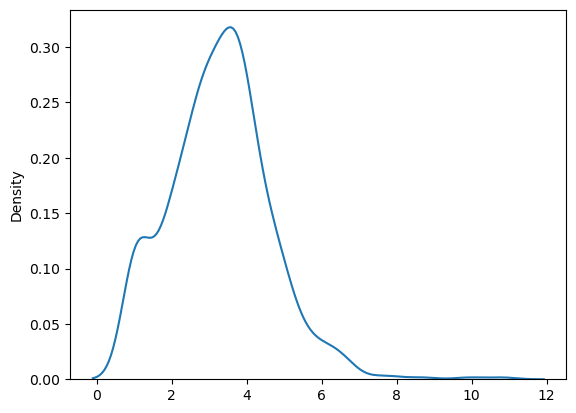

In [12]:
sns.kdeplot([m.data.Ae for m in all_short])

<Axes: ylabel='Density'>

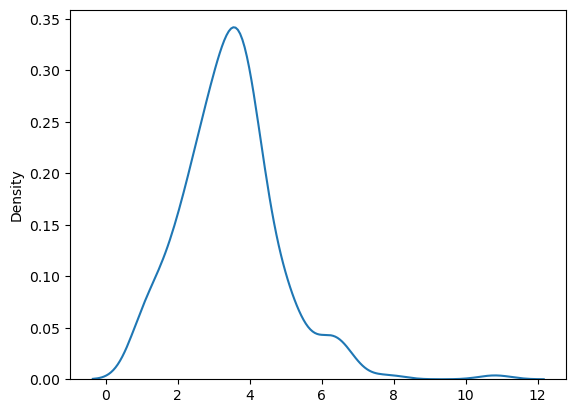

In [13]:
sns.kdeplot([m.data.Ae for m in rep_short])

<Axes: ylabel='Density'>

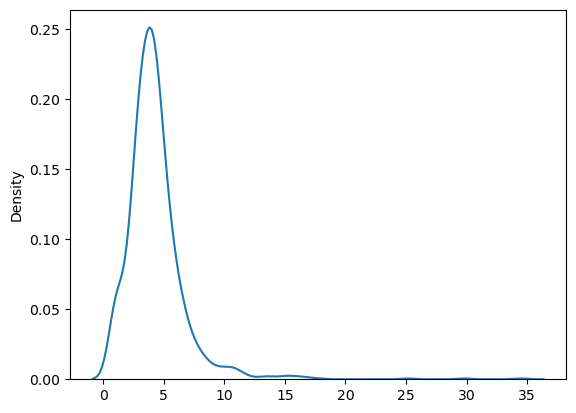

In [14]:
sns.kdeplot([m.data.Ae for m in all_medium])

<Axes: ylabel='Density'>

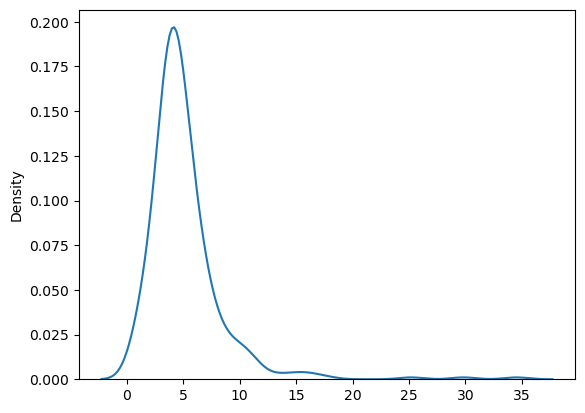

In [15]:
sns.kdeplot([m.data.Ae for m in rep_medium])

<Axes: ylabel='Density'>

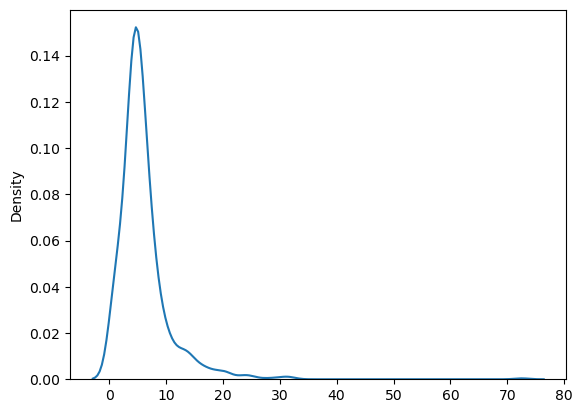

In [16]:
sns.kdeplot([m.data.Ae for m in all_long])

<Axes: ylabel='Density'>

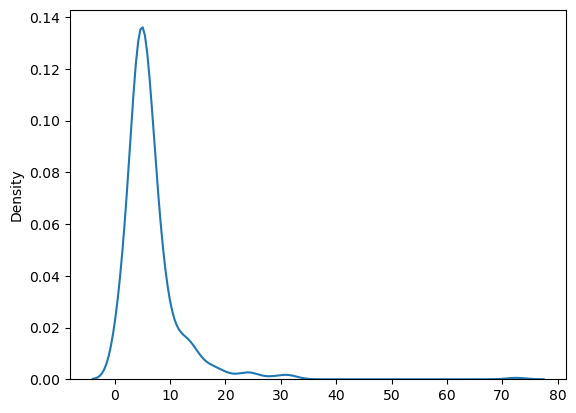

In [17]:
sns.kdeplot([m.data.Ae for m in rep_long])

In [21]:
data = list()
for marker in markers:
    if len(marker) >= 300:
        continue
    if len(marker) < 100:
        length = "Short"
    elif 100 <= len(marker) < 200:
        length = "Medium"
    else:
        length = "Long"
    suffix = "Repetitive" if marker.name in rep_marker_ids else "NonRepetitive"
    category = f"{length}{suffix}"
    data.append((marker.name, category, marker.data.Ae))
dataframe = pd.DataFrame(data, columns=["Marker", "Category", "Ae"])

In [22]:
dataframe

,Marker,Category,Ae
0,mh01LW-3,ShortRepetitive,1.000
1,mh01WL-090,MediumNonRepetitive,5.499
2,mh01KK-172.v1,LongNonRepetitive,3.775
3,mh01KK-172.v2,LongNonRepetitive,4.930
4,mh01KK-172.v3,LongNonRepetitive,4.930
...,...,...,...
2590,mh0XUSC-XqD,ShortNonRepetitive,2.027
2591,mh0XUSC-XqE,ShortNonRepetitive,2.506
2592,mh0XUSC-XqF,ShortNonRepetitive,2.389
2593,mh0XUSC-XqG,ShortNonRepetitive,3.423


/Users/daniel.standage/anaconda3/envs/microhapdb/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/daniel.standage/anaconda3/envs/microhapdb/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/daniel.standage/anaconda3/envs/microhapdb/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


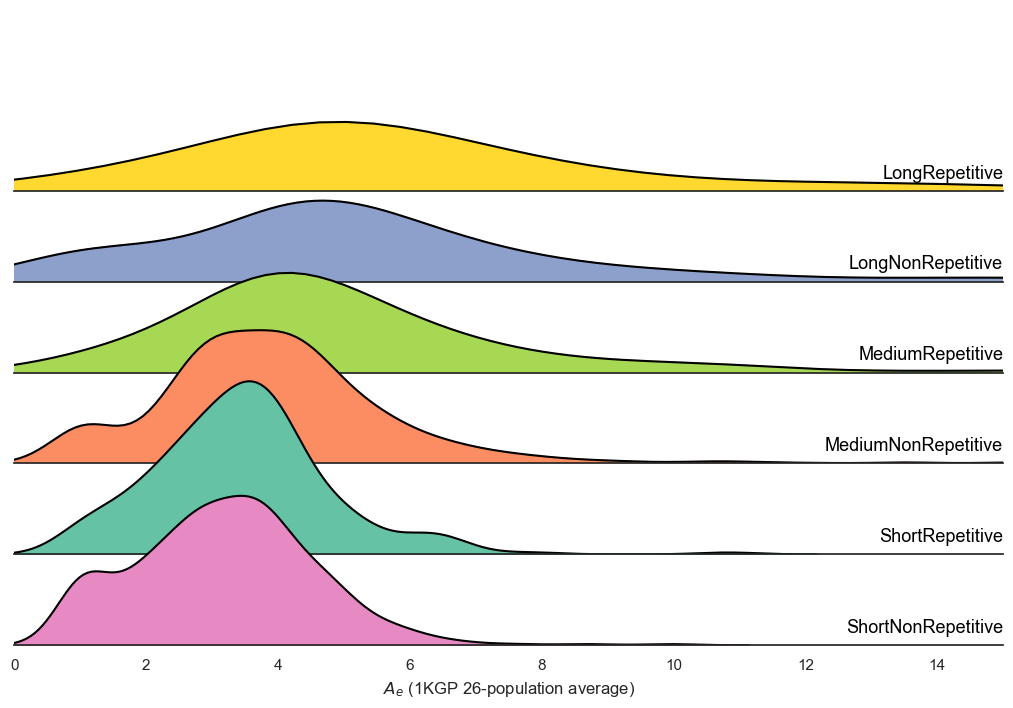

In [62]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
palette = sns.color_palette("Set2", 6)
g = sns.FacetGrid(dataframe, row="Category", hue="Category", palette=palette, aspect=9, height=1.2, row_order=["LongRepetitive", "LongNonRepetitive", "MediumRepetitive", "MediumNonRepetitive", "ShortRepetitive", "ShortNonRepetitive",])
g.map_dataframe(sns.kdeplot, x="Ae", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Ae", color="black")
g.set_titles("")
g.despine(left=True)
def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, color="black", fontsize=13, ha="right", va="center", transform=ax.transAxes)
g.map(label, "Category")
g.fig.subplots_adjust(hspace=-0.5)
g.set(yticks=[], xlim=(0, 15), ylabel="", xlabel="$A_e$ (1KGP 26-population average)")

<Axes: ylabel='Density'>

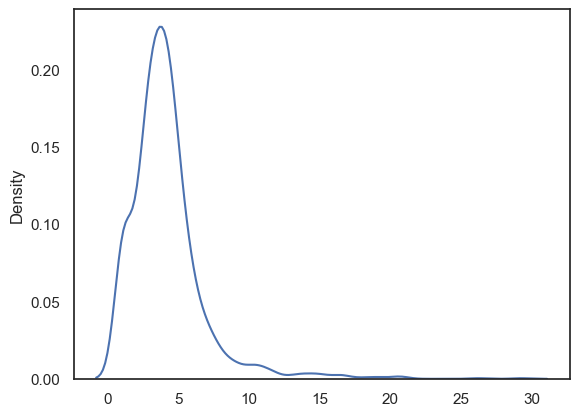

In [69]:
sns.kdeplot([m.data.Ae for m in markers if m.name not in rep_marker_ids])

In [65]:
len(rep_marker_ids)

1380

In [66]:
len(markers)

3053

In [74]:
data2 = list()
for marker in markers:
    if len(marker) >= 300:
        continue
    if marker.name in rep_marker_ids:
        continue
    if len(marker) < 100:
        length = "Short"
    elif 100 <= len(marker) < 200:
        length = "Medium"
    else:
        length = "Long"
    data2.append((marker.name, length, marker.data.Ae))
dataframe2 = pd.DataFrame(data2, columns=["Marker", "Category", "Ae"])

In [75]:
dataframe2

,Marker,Category,Ae
0,mh01WL-090,Medium,5.499
1,mh01KK-172.v1,Long,3.775
2,mh01KK-172.v2,Long,4.930
3,mh01KK-172.v3,Long,4.930
4,mh01USC-1pA,Short,4.629
...,...,...,...
1567,mh0XUSC-XqA,Short,2.811
1568,mh0XUSC-XqD,Short,2.027
1569,mh0XUSC-XqE,Short,2.506
1570,mh0XUSC-XqF,Short,2.389


/Users/daniel.standage/anaconda3/envs/microhapdb/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/daniel.standage/anaconda3/envs/microhapdb/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/daniel.standage/anaconda3/envs/microhapdb/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


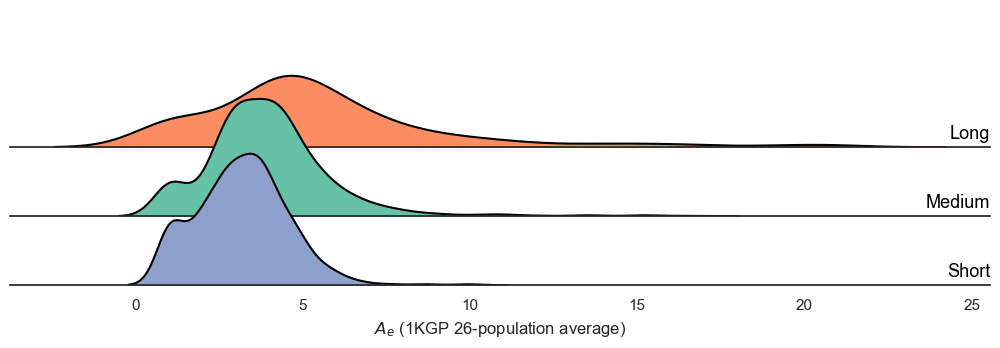

In [77]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
palette = sns.color_palette("Set2", 3)
g = sns.FacetGrid(dataframe2, row="Category", hue="Category", palette=palette, aspect=9, height=1.2, row_order=["Long", "Medium", "Short",])
g.map_dataframe(sns.kdeplot, x="Ae", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Ae", color="black")
g.set_titles("")
g.despine(left=True)
def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, color="black", fontsize=13, ha="right", va="center", transform=ax.transAxes)
g.map(label, "Category")
g.fig.subplots_adjust(hspace=-0.5)
g.set(yticks=[], ylabel="", xlabel="$A_e$ (1KGP 26-population average)")

In [95]:
high = set([m.locus for m in markers if (m.data.Ae > 15 and m.name not in rep_marker_ids and len(m) < 250)])
len(high)

5

In [96]:
print(*sorted(high))

mh01KK-212 mh01WL-005 mh04WL-052 mh06WL-051 mh12KK-201


In [97]:
medium = set([m.locus for m in markers if (m.data.Ae > 10 and m.data.Ae < 15 and m.name not in rep_marker_ids and m.locus not in high and len(m) < 250)])
print(*sorted(medium))
print(len(medium))

mh01WL-006 mh01WL-010 mh02WL-002 mh03LV-06 mh06WL-017 mh07WL-022 mh10WL-012 mh10WL-031 mh13USC-13qA mh13WL-001 mh16WL-038 mh17FHL-005
12
